In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Set 준비

In [ ]:
train_data = pd.read_csv('train_set.csv', index_col = 0)
test_data = pd.read_csv('test_set.csv', index_col = 0)

In [ ]:
train_data

,date,cabbage,radish,garlic,onion,daikon,cilantro,artichoke
0,2021-01-02,713.00,760.00,4182.76,1282.48,2163.33,3862.77,12340.35
1,2021-01-04,1946.90,708.50,4427.22,1381.92,2083.49,3539.80,8773.32
2,2021-01-05,1307.79,996.28,4731.48,1396.43,2316.91,3281.04,10148.78
3,2021-01-06,1942.60,1012.55,4420.99,1484.83,2555.18,3440.97,11108.13
4,2021-01-07,1872.97,694.47,4080.54,1488.01,2740.90,3018.87,11615.35
...,...,...,...,...,...,...,...,...
1241,2024-12-26,2548.80,1332.04,5217.14,1161.23,1487.55,11351.61,11099.88
1242,2024-12-27,3642.66,1545.93,4674.20,1200.78,1503.53,10328.21,11454.85
1243,2024-12-28,2941.62,1325.48,4317.21,1292.75,1396.15,12691.50,11325.36
1244,2024-12-30,2287.54,2270.71,4904.38,1167.73,1566.44,10164.39,11842.47


In [ ]:
test_data

,date,cabbage,radish,garlic,onion,daikon,cilantro,artichoke
0,2025-01-02,4832.75,1217.56,5843.78,1408.03,1580.95,12188.33,14781.40
1,2025-01-03,3110.80,2309.07,4613.04,1281.47,1683.65,12823.14,11304.91
2,2025-01-04,2466.66,2308.51,4664.59,1355.17,1567.71,11395.75,11444.51
3,2025-01-06,3728.57,1671.05,4721.10,1308.74,1659.86,10287.87,12001.80
4,2025-01-07,2640.44,1926.03,5034.74,1430.88,1837.39,8227.55,10084.76
...,...,...,...,...,...,...,...,...
110,2025-05-15,1948.11,1421.56,3806.53,829.99,797.14,8056.35,7504.12
111,2025-05-16,2310.72,1936.55,4228.17,839.24,805.38,5142.38,7484.80
112,2025-05-17,10743.00,992.69,4385.40,952.11,811.21,6541.44,6750.44
113,2025-05-19,7946.91,1060.81,5659.89,903.22,1089.97,4668.99,7030.72


In [ ]:
# 1월부터 4월까지의 데이터를 활용해 test 진행 예정이기 때문에 5월 데이터는 삭제
test_data['date'] = pd.to_datetime(test_data['date'])
test_data = test_data[test_data['date'].dt.month != 5]
test_data.tail()

,date,cabbage,radish,garlic,onion,daikon,cilantro,artichoke
93,2025-04-25,3760.42,2004.59,4116.21,1249.71,670.54,6485.02,5548.51
94,2025-04-26,2156.31,2470.71,3970.21,1284.41,668.11,6097.55,6511.69
95,2025-04-28,32127.52,1485.51,4212.23,1119.54,689.10,5698.70,5424.83
96,2025-04-29,4154.87,1302.11,4651.40,1150.63,767.71,6454.00,6009.32
97,2025-04-30,4740.45,1109.83,4438.43,1149.61,780.90,5330.21,5582.41


## EDA 진행

In [ ]:
print(train_data.info())
print('=' * 50)
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1246 entries, 0 to 1245
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       1246 non-null   object 
 1   cabbage    1240 non-null   float64
 2   radish     1241 non-null   float64
 3   garlic     1239 non-null   float64
 4   onion      1239 non-null   float64
 5   daikon     1244 non-null   float64
 6   cilantro   1236 non-null   float64
 7   artichoke  1239 non-null   float64
dtypes: float64(7), object(1)
memory usage: 119.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 98 entries, 0 to 97
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       98 non-null     datetime64[ns]
 1   cabbage    98 non-null     float64       
 2   radish     97 non-null     float64       
 3   garlic     98 non-null     float64       
 4   onion      97 non-null     float64       
 5   daikon   

In [ ]:
print(train_data.isnull().sum())
print('=' * 50)
print(test_data.isnull().sum())

date          0
cabbage       6
radish        5
garlic        7
onion         7
daikon        2
cilantro     10
artichoke     7
dtype: int64
date         0
cabbage      0
radish       1
garlic       0
onion        1
daikon       0
cilantro     0
artichoke    0
dtype: int64


- Nan 값이 존재. 해당 값들을 해당 월의 평균 값으로 대체

In [ ]:
train_data['date'] = pd.to_datetime(train_data['date'])
train_data['year_month'] = train_data['date'].dt.to_period('M')

test_data['date'] = pd.to_datetime(test_data['date'])
test_data['year_month'] = test_data['date'].dt.to_period('M')

rows = train_data.isna().any(axis=1)
print(train_data[rows].head())

          date  cabbage  radish   garlic   onion   daikon  cilantro  \
31  2021-02-07   553.20  356.68      NaN  1030.0  3772.44       NaN   
223 2021-09-20  2985.97  576.81  6959.62     NaN  1441.37   1706.55   
336 2022-02-03  1668.21  435.42  6796.20   450.0  1904.38       NaN   
411 2022-05-01      NaN     NaN  8100.00     NaN      NaN       NaN   
424 2022-05-15      NaN     NaN  5440.00     NaN      NaN       NaN   

     artichoke year_month  
31     7213.89    2021-02  
223    5121.82    2021-09  
336   11550.61    2022-02  
411        NaN    2022-05  
424        NaN    2022-05  


In [ ]:
# test 데이터 속 cilantror != cilantro
test_data.columns = train_data.columns

features = train_data.drop(columns=['date','year_month']).columns

for feature in features:
    #------------train data--------------
    train_avg_month = train_data.groupby('year_month')[feature].mean().round(2)
    train_rows_NaN_feature = train_data[train_data[feature].isna()].index

    for idx in train_rows_NaN_feature:
        year_month = train_data.at[idx, 'year_month']
        if pd.notna(train_avg_month.get(year_month)):
            train_data.at[idx, feature] = train_avg_month[year_month]

    #------------test data--------------
    test_avg_month = test_data.groupby('year_month')[feature].mean().round(2)
    test_rows_NaN_feature = test_data[test_data[feature].isna()].index

    for idx in test_rows_NaN_feature:
        year_month = test_data.at[idx, 'year_month']
        if pd.notna(test_avg_month.get(year_month)):
            test_data.at[idx, feature] = test_avg_month[year_month]


In [ ]:
print(train_data[rows].head())

          date  cabbage  radish   garlic    onion   daikon  cilantro  \
31  2021-02-07   553.20  356.68  4415.75  1030.00  3772.44   4243.76   
223 2021-09-20  2985.97  576.81  6959.62   893.28  1441.37   1706.55   
336 2022-02-03  1668.21  435.42  6796.20   450.00  1904.38   4907.77   
411 2022-05-01  2429.81  918.75  8100.00   635.36  1295.08   5041.66   
424 2022-05-15  2429.81  918.75  5440.00   635.36  1295.08   5041.66   

     artichoke year_month  
31     7213.89    2021-02  
223    5121.82    2021-09  
336   11550.61    2022-02  
411    6634.13    2022-05  
424    6634.13    2022-05  


In [ ]:
train_data.drop(columns='year_month', inplace=True)
test_data.drop(columns='year_month', inplace=True)

In [ ]:
print(train_data.isnull().sum())
print('=' * 50)
print(test_data.isnull().sum())

date         0
cabbage      0
radish       0
garlic       0
onion        0
daikon       0
cilantro     0
artichoke    0
dtype: int64
date         0
cabbage      0
radish       0
garlic       0
onion        0
daikon       0
cilantro     0
artichoke    0
dtype: int64


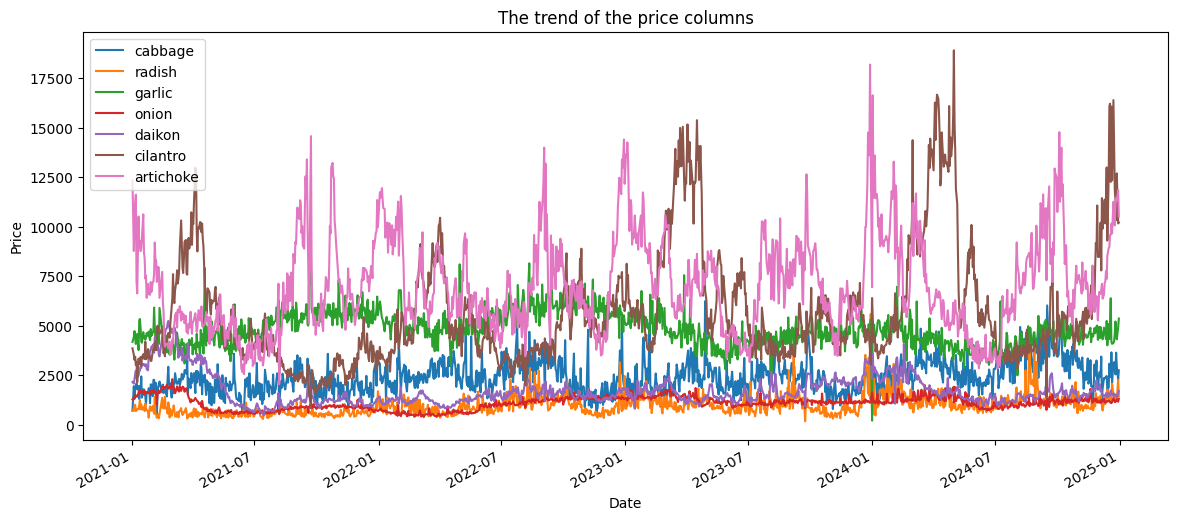

In [ ]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

train_data.set_index('date').plot(figsize = (14, 6))

plt.title("The trend of the price columns")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

In [ ]:
def calculate_rolling_mean(data, window = 7):
    data_rolling_mean = data.drop(columns = ['date']).rolling(window = window, min_periods = 1).mean()

    data_rolling_mean['date'] = data['date']

    return data_rolling_mean

train_data_roll = calculate_rolling_mean(train_data)

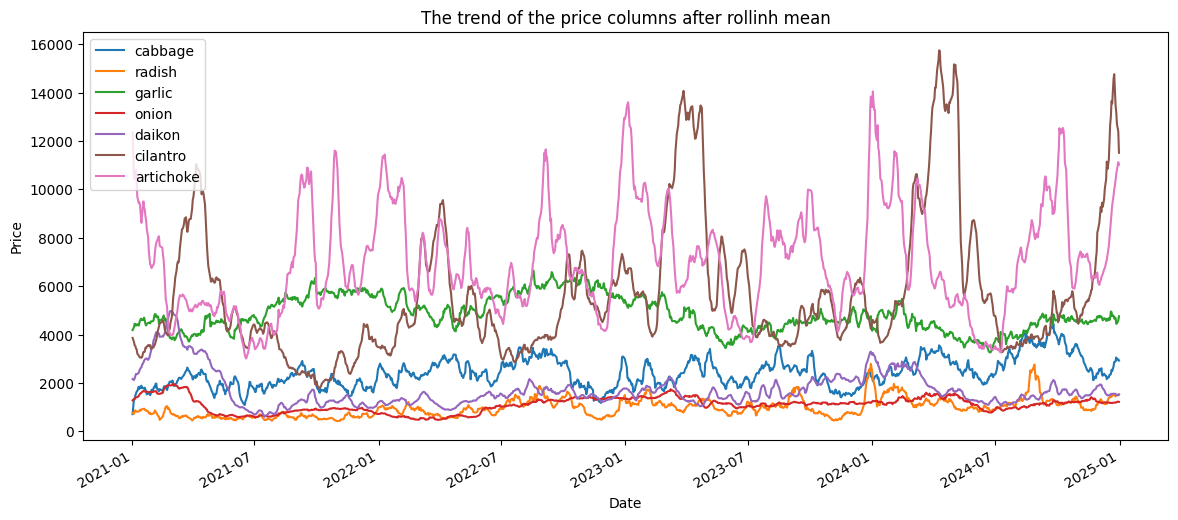

In [ ]:
train_data_roll.set_index('date').plot(figsize = (14, 6))

plt.title("The trend of the price columns after rollinh mean")
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

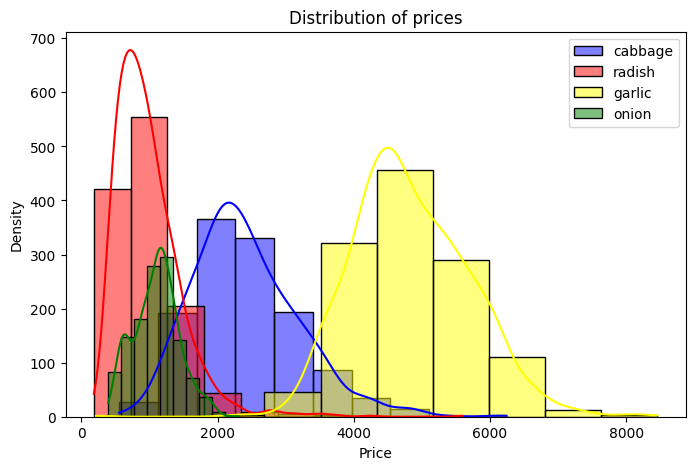

In [ ]:
import seaborn as sns

plt.figure(figsize = (8, 5))

sns.histplot(train_data['cabbage'], bins = 10, kde = True, label = 'cabbage', color = 'blue', edgecolor = 'black')
sns.histplot(train_data['radish'], bins = 10, kde = True, label = 'radish', color = 'red', edgecolor = 'black')
sns.histplot(train_data['garlic'], bins = 10, kde = True, label = 'garlic', color = 'yellow', edgecolor = 'black')
sns.histplot(train_data['onion'], bins = 10, kde = True, label = 'onion', color = 'green', edgecolor = 'black')

plt.title('Distribution of prices', fontsize = 12)
plt.xlabel('Price', fontsize = 10)
plt.ylabel('Density', fontsize = 10)
plt.legend()
plt.show()

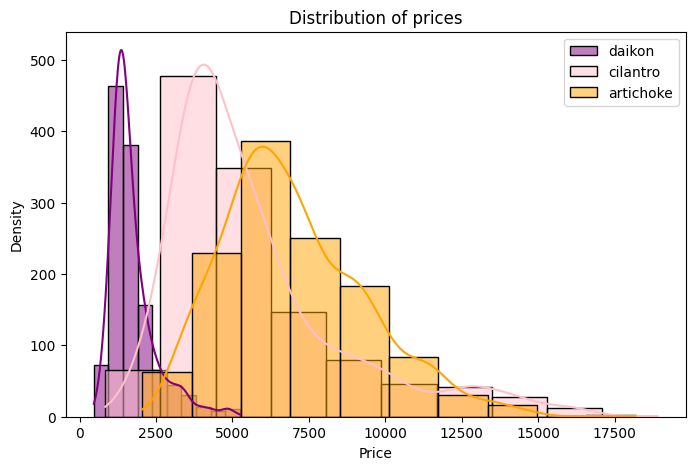

In [ ]:
plt.figure(figsize = (8, 5))

sns.histplot(train_data['daikon'], bins = 10, kde = True, label = 'daikon', color = 'purple', edgecolor = 'black')
sns.histplot(train_data['cilantro'], bins = 10, kde = True, label = 'cilantro', color = 'pink', edgecolor = 'black')
sns.histplot(train_data['artichoke'], bins = 10, kde = True, label = 'artichoke', color = 'orange', edgecolor = 'black')

plt.title('Distribution of prices', fontsize = 12)
plt.xlabel('Price', fontsize = 10)
plt.ylabel('Density', fontsize = 10)
plt.legend()
plt.show()

In [ ]:
train_data_analysis = train_data.copy()
train_data_analysis['date'] = pd.to_datetime(train_data['date'])
train_data_analysis['day'] = train_data['date'].dt.day_of_week
train_data_analysis['month'] = train_data['date'].dt.month

price_by_day = train_data_analysis.groupby("day")[['cabbage', 'radish', 'garlic', 'onion', 'daikon', 'cilantro', 'artichoke']].mean().round(2)
price_by_month = train_data_analysis.groupby("month")[['cabbage', 'radish', 'garlic', 'onion', 'daikon', 'cilantro', 'artichoke']].mean().round(2)

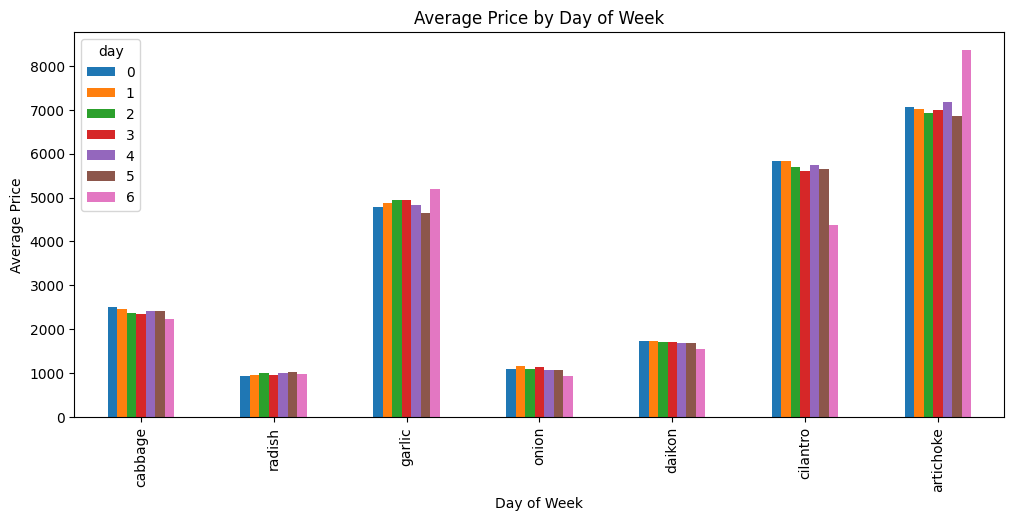

In [ ]:
price_by_day.T.plot(kind = 'bar', figsize = (12, 5))
plt.title('Average Price by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Price')
plt.show()

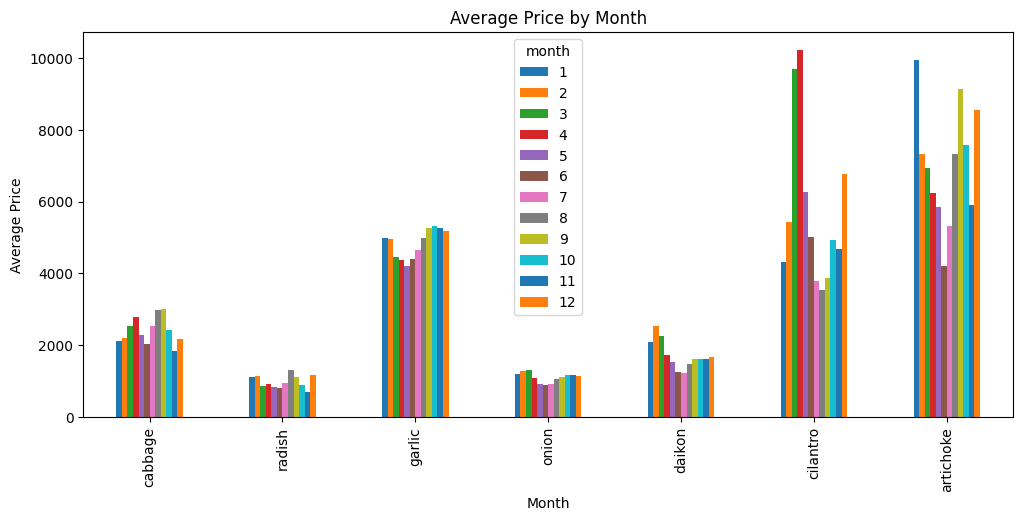

In [ ]:
price_by_month.T.plot(kind = 'bar', figsize = (12, 5))

plt.title("Average Price by Month")
plt.xlabel("Month")
plt.ylabel("Average Price")
plt.show()

In [ ]:
# Day, Month는 무시

cor_matrix_train = train_data_analysis.corr()[1:].drop('date', axis = 1)
cor_matrix_train.style.background_gradient(cmap = 'coolwarm')

,cabbage,radish,garlic,onion,daikon,cilantro,artichoke,day,month
cabbage,1.000000,0.339659,-0.085639,0.053447,-0.050555,0.127825,0.259864,-0.036280,-0.000250
radish,0.339659,1.000000,-0.006457,0.200517,0.101324,0.080207,0.339039,0.053851,-0.007680
garlic,-0.085639,-0.006457,1.000000,-0.041142,-0.154355,-0.253576,0.221336,-0.033893,0.253794
onion,0.053447,0.200517,-0.041142,1.000000,0.559508,0.327882,0.151178,-0.051554,-0.064181
daikon,-0.050555,0.101324,-0.154355,0.559508,1.000000,0.107274,0.126964,-0.026526,-0.276781
cilantro,0.127825,0.080207,-0.253576,0.327882,0.107274,1.000000,-0.037530,-0.027409,-0.225754
artichoke,0.259864,0.339039,0.221336,0.151178,0.126964,-0.037530,1.000000,-0.000330,-0.015774
day,-0.036280,0.053851,-0.033893,-0.051554,-0.026526,-0.027409,-0.000330,1.000000,0.001071
month,-0.000250,-0.007680,0.253794,-0.064181,-0.276781,-0.225754,-0.015774,0.001071,1.000000


In [ ]:
cor_matrix_test = test_data.corr()[1:].drop('date', axis = 1)
cor_matrix_test.style.background_gradient(cmap = 'coolwarm')

,cabbage,radish,garlic,onion,daikon,cilantro,artichoke
cabbage,1.000000,-0.054484,-0.134288,0.021589,-0.252919,0.240053,-0.203422
radish,-0.054484,1.000000,-0.031106,0.230357,0.212456,-0.055945,0.030531
garlic,-0.134288,-0.031106,1.000000,0.192452,0.256041,0.133909,0.171338
onion,0.021589,0.230357,0.192452,1.000000,0.385015,-0.015521,-0.051188
daikon,-0.252919,0.212456,0.256041,0.385015,1.000000,-0.345792,0.396517
cilantro,0.240053,-0.055945,0.133909,-0.015521,-0.345792,1.000000,0.028393
artichoke,-0.203422,0.030531,0.171338,-0.051188,0.396517,0.028393,1.000000


## Construct baseline model

- 시계열 알고리즘과 ML 알고리즘 모두 구현해볼 예정
- 해당 데이터는 시계열 데이터로써 시계열 알고리즘의 성능도 어느정도 기대해볼 수 있음
- 시계열 알고리즘의 경우 Prophet을 사용 예정
- ML 알고리즘의 경우 Feature의 퀄리티에 따라 성능에 영향이 가기 때문에 Feature Engineering 과정이 중요
- ML 알고리즘의 경우 Linear Regression, Ridge, Lasso, RandomForest, LGBM, XGBOOST를 사용하여 사용자가 다양한 모델을 사용할 수 있도록 할 예정

### Prophet을 이용한 시계열 데이터 예측

In [ ]:
def fill_missing_prices(df_with_nans, date_column_name):
    """
    날짜별로 펼쳐진 와이드 포맷 데이터에서 NaN으로 표시된 휴일 및 주말 가격을
    다음 규칙에 따라 채우는 함수:
    1. 1월 1일의 NaN은 bfill (다음 유효한 날의 값으로 채움).
    2. 그 외의 NaN (다른 공휴일, 일요일 등)은 ffill (이전 유효한 날의 값으로 채움).

    Args:
        df_with_nans (pd.DataFrame): 휴일/일요일 행이 NaN으로 추가된 데이터프레임.
        date_column_name (str): 날짜 컬럼의 이름.

    Returns:
        pd.DataFrame: NaN 값이 규칙에 따라 채워진 데이터프레임.
    """
    if df_with_nans.empty:
        print("입력된 데이터프레임이 비어있습니다.")
        return df_with_nans

    df_filled = df_with_nans.copy()

    # 날짜 컬럼을 인덱스로 설정 (ffill/bfill 작업을 용이하게 하기 위해)
    # 만약 이미 인덱스라면 이 부분은 스킵될 수 있도록 처리
    is_date_col_in_columns = date_column_name in df_filled.columns
    if is_date_col_in_columns:
        try:
            # 날짜 컬럼 타입 확인 및 변환 (이미 datetime이어야 하지만 안전장치)
            if not pd.api.types.is_datetime64_any_dtype(df_filled[date_column_name]):
                df_filled[date_column_name] = pd.to_datetime(df_filled[date_column_name])
            df_filled = df_filled.set_index(date_column_name)
        except Exception as e:
            print(f"'{date_column_name}'을 인덱스로 설정 중 오류: {e}. 날짜 컬럼을 확인해주세요.")
            return df_with_nans # 원본 반환

    # 가격 정보를 담고 있는 컬럼들 (날짜 인덱스를 제외한 모든 컬럼)
    price_columns = df_filled.columns.tolist()

    if not price_columns:
        print("가격 데이터 컬럼이 없습니다.")
        if is_date_col_in_columns: # 인덱스를 원래대로 되돌리기 시도
            df_filled = df_filled.reset_index()
        return df_filled


    print("NaN 채우기 시작...")
    # 1. 1월 1일 NaN 값에 대해 bfill 적용
    # 각 가격 컬럼별로 처리
    jan_1st_mask = (df_filled.index.month == 1) & (df_filled.index.day == 1)

    if jan_1st_mask.any(): # 1월 1일이 인덱스에 하나라도 있다면
        print("1월 1일 데이터 bfill 처리 중...")
        for col in price_columns:
            # 해당 컬럼에서 1월 1일이면서 NaN인 위치를 찾음
            nan_on_jan_1st_for_col = df_filled[col].isna() & jan_1st_mask

            if nan_on_jan_1st_for_col.any():
                # bfill을 전체 컬럼에 적용해서 채울 값들을 미리 준비
                bfilled_column_values = df_filled[col].bfill()
                # 해당 위치에만 bfill된 값을 적용
                df_filled.loc[nan_on_jan_1st_for_col, col] = bfilled_column_values[nan_on_jan_1st_for_col]
                # print(f"  컬럼 '{col}'의 1월 1일 NaN이 bfill 처리됨.")
    else:
        print("데이터 인덱스에 1월 1일이 없어 bfill 처리를 건너뜁니다.")


    # 2. 나머지 모든 NaN 값에 대해 ffill 적용
    print("기타 휴일 및 일요일 데이터 ffill 처리 중...")
    df_filled[price_columns] = df_filled[price_columns].ffill()

    # (선택적) ffill 후에도 맨 처음에 NaN이 남아있을 수 있음 (예: 전체 데이터 시작이 휴일인 경우)
    # 이 경우 bfill을 한 번 더 약하게 전체적으로 적용해볼 수 있지만, 현재 요구사항은 아님.
    # df_filled[price_columns] = df_filled[price_columns].bfill(limit=1) # 예시: 맨 앞 NaN만 한번 더 채우기

    print("NaN 채우기 완료.")

    # 날짜 인덱스를 다시 컬럼으로 되돌리기 (원본 데이터프레임 형태 유지)
    if is_date_col_in_columns:
        df_filled = df_filled.reset_index()

    return df_filled

In [ ]:
# 훈령용 데이터셋 준비
train_data = pd.read_csv('train_set.csv', index_col = 0)
# 검증 데이터셋 준비
test_data = pd.read_csv('test_set.csv', index_col = 0)

In [ ]:
test_data['date'] = pd.to_datetime(test_data['date'])
test_data = test_data[test_data['date'].dt.month != 5]
test_data.tail()

,date,cabbage,radish,garlic,onion,daikon,cilantro,artichoke
93,2025-04-25,3760.42,2004.59,4116.21,1249.71,670.54,6485.02,5548.51
94,2025-04-26,2156.31,2470.71,3970.21,1284.41,668.11,6097.55,6511.69
95,2025-04-28,32127.52,1485.51,4212.23,1119.54,689.10,5698.70,5424.83
96,2025-04-29,4154.87,1302.11,4651.40,1150.63,767.71,6454.00,6009.32
97,2025-04-30,4740.45,1109.83,4438.43,1149.61,780.90,5330.21,5582.41


In [ ]:
import holidays

def add_missing_holidays_and_sundays(df, date_column_name):
    """
    와이드 포맷 데이터에 누락된 공휴일(1월 1일 포함 조정) 및 모든 일요일을 행으로 추가하는 함수.

    Args:
        df (pd.DataFrame): 원본 데이터프레임 (와이드 포맷).
        date_column_name (str): 날짜 정보가 담긴 컬럼의 이름.

    Returns:
        pd.DataFrame: 누락된 공휴일/일요일 행이 추가되고 날짜순으로 정렬된 데이터프레임.
    """
    if df.empty:
        print("입력된 데이터프레임이 비어있습니다.")
        return df

    df_copy = df.copy()
    try:
        df_copy[date_column_name] = pd.to_datetime(df_copy[date_column_name], errors='raise') # 에러 발생시 중단
    except Exception as e:
        print(f"'{date_column_name}' 컬럼을 datetime으로 변환 중 오류 발생: {e}. 날짜 형식을 확인해주세요.")
        return df # 원본 반환

    # NaT 값 제거 (만약 errors='coerce'를 쓴다면 필요)
    # df_copy = df_copy.dropna(subset=[date_column_name])
    # if df_copy.empty:
    #     print(f"'{date_column_name}' 컬럼에 유효한 날짜가 없습니다.")
    #     return df

    data_min_date = df_copy[date_column_name].min()
    data_max_date = df_copy[date_column_name].max()

    if pd.isna(data_min_date) or pd.isna(data_max_date):
        print("데이터의 날짜 범위를 확인할 수 없습니다 (min/max가 NaT).")
        return df_copy # 또는 원본 df

    print(f"데이터 원본 날짜 범위: {data_min_date.strftime('%Y-%m-%d')} ~ {data_max_date.strftime('%Y-%m-%d')}")

    existing_dates = set(df_copy[date_column_name])
    item_price_columns = [col for col in df_copy.columns if col != date_column_name]
    all_new_rows = []

    # 1. 해당 연도들의 공식 공휴일 가져오기
    official_holidays_set = set()
    try:
        # 데이터가 걸쳐있는 모든 연도의 공휴일을 가져옴
        years_in_data = list(range(data_min_date.year, data_max_date.year + 1))
        if years_in_data: # years_in_data가 비어있지 않은 경우에만 실행
            kr_hols = holidays.KR(years=years_in_data)
            for date_obj, name in kr_hols.items():
                official_holidays_set.add(pd.to_datetime(date_obj))
            print(f"{len(official_holidays_set)}개의 공식 공휴일 발견 (연도 범위: {min(years_in_data)}-{max(years_in_data)})")
        else:
            print("데이터에서 유효한 연도 범위를 찾을 수 없어 공휴일을 가져오지 못했습니다.")

    except Exception as e:
        print(f"공식 공휴일 정보를 가져오는 중 오류 발생: {e}")

    # 2. 추가할 날짜의 유효 범위 설정 (1월 1일 특별 고려)
    # 기본적으로 데이터의 실제 시작일과 종료일을 기준으로 하되,
    # 데이터가 1월 1일 직후에 시작하면 1월 1일도 포함시키도록 시작일 조정
    effective_start_date_for_check = data_min_date
    # 만약 데이터 시작일이 해당 연도 1월이고, 1일 이후이며, 1월 1일이 공휴일이라면 시작일을 1월 1일로 조정
    if data_min_date.month == 1 and data_min_date.day > 1:
        jan_first_of_min_year = pd.Timestamp(year=data_min_date.year, month=1, day=1)
        if jan_first_of_min_year in official_holidays_set: # 공식 공휴일인지 확인
            effective_start_date_for_check = jan_first_of_min_year
            print(f"데이터 시작일({data_min_date.strftime('%Y-%m-%d')})이 1월 1일 이후이므로, 유효 시작일을 {effective_start_date_for_check.strftime('%Y-%m-%d')}로 조정합니다.")

    print(f"데이터 추가를 위한 유효 날짜 범위: {effective_start_date_for_check.strftime('%Y-%m-%d')} ~ {data_max_date.strftime('%Y-%m-%d')}")

    # 3. 유효 범위 내의 모든 일요일 가져오기
    sundays_set = set()
    # effective_start_date_for_check 부터 data_max_date 까지의 모든 날짜를 순회하며 일요일 찾기
    # (두 날짜가 유효할 때만)
    if not (pd.isna(effective_start_date_for_check) or pd.isna(data_max_date)):
        current_iter_date = effective_start_date_for_check
        while current_iter_date <= data_max_date:
            if current_iter_date.dayofweek == 6: # 0:월요일, 6:일요일
                sundays_set.add(current_iter_date)
            current_iter_date += pd.Timedelta(days=1)
        print(f"{len(sundays_set)}개의 일요일 발견 (유효 범위 내)")


    # 4. 추가할 후보 날짜들 통합 (공식 공휴일 + 일요일)
    # 공식 공휴일 중에서도 effective_start_date_for_check 와 data_max_date 범위 내에 있는 것만 고려
    candidate_dates = {h for h in official_holidays_set if effective_start_date_for_check <= h <= data_max_date}
    candidate_dates.update(sundays_set) # 일요일은 이미 위에서 범위 필터링됨

    sorted_candidate_dates = sorted(list(candidate_dates))
    print(f"총 {len(sorted_candidate_dates)}개의 추가 후보 날짜 (공식 공휴일 + 일요일, 중복 제거 및 범위 필터링됨)")


    # 5. 최종적으로 행 추가 작업
    added_dates_count = 0
    for date_to_check in sorted_candidate_dates:
        # 이미 존재하는 날짜는 건너뛰고, 최종 유효 범위 내의 날짜만 추가
        # (sorted_candidate_dates는 이미 effective_start_date_for_check 와 data_max_date 범위 내의 날짜들임)
        if date_to_check not in existing_dates:
            new_row = {date_column_name: date_to_check}
            for item_col in item_price_columns:
                new_row[item_col] = np.nan
            all_new_rows.append(new_row)
            added_dates_count +=1
            # print(f"추가됨: {date_to_check.strftime('%Y-%m-%d')}") # 필요시 확인용

    print(f"실제로 추가된 새 행의 수: {added_dates_count}")

    if all_new_rows:
        new_rows_df = pd.DataFrame(all_new_rows)
        if not new_rows_df.empty: # new_rows_df가 비어있지 않을 때만 컬럼 순서 조정
             new_rows_df = new_rows_df[df_copy.columns.tolist()] # 컬럼 순서 맞추기

        df_final = pd.concat([df_copy, new_rows_df], ignore_index=True)
    else:
        df_final = df_copy

    df_final = df_final.sort_values(by=[date_column_name]).reset_index(drop=True)
    return df_final

In [ ]:
train_data['date'] = pd.to_datetime(train_data['date'])

train_data_full = add_missing_holidays_and_sundays(train_data, 'date')

test_data_full = add_missing_holidays_and_sundays(test_data, 'date')

데이터 원본 날짜 범위: 2021-01-02 ~ 2024-12-31
74개의 공식 공휴일 발견 (연도 범위: 2021-2024)
데이터 시작일(2021-01-02)이 1월 1일 이후이므로, 유효 시작일을 2021-01-01로 조정합니다.
데이터 추가를 위한 유효 날짜 범위: 2021-01-01 ~ 2024-12-31
209개의 일요일 발견 (유효 범위 내)
총 272개의 추가 후보 날짜 (공식 공휴일 + 일요일, 중복 제거 및 범위 필터링됨)
실제로 추가된 새 행의 수: 215
데이터 원본 날짜 범위: 2025-01-02 ~ 2025-04-30
19개의 공식 공휴일 발견 (연도 범위: 2025-2025)
데이터 시작일(2025-01-02)이 1월 1일 이후이므로, 유효 시작일을 2025-01-01로 조정합니다.
데이터 추가를 위한 유효 날짜 범위: 2025-01-01 ~ 2025-04-30
17개의 일요일 발견 (유효 범위 내)
총 24개의 추가 후보 날짜 (공식 공휴일 + 일요일, 중복 제거 및 범위 필터링됨)
실제로 추가된 새 행의 수: 19


In [ ]:
train_data_full

,date,cabbage,radish,garlic,onion,daikon,cilantro,artichoke
0,2021-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-01-02,713.00,760.00,4182.76,1282.48,2163.33,3862.77,12340.35
2,2021-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-01-04,1946.90,708.50,4427.22,1381.92,2083.49,3539.80,8773.32
4,2021-01-05,1307.79,996.28,4731.48,1396.43,2316.91,3281.04,10148.78
...,...,...,...,...,...,...,...,...
1456,2024-12-27,3642.66,1545.93,4674.20,1200.78,1503.53,10328.21,11454.85
1457,2024-12-28,2941.62,1325.48,4317.21,1292.75,1396.15,12691.50,11325.36
1458,2024-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1459,2024-12-30,2287.54,2270.71,4904.38,1167.73,1566.44,10164.39,11842.47


In [ ]:
test_data_full

,date,cabbage,radish,garlic,onion,daikon,cilantro,artichoke
0,2025-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-01-02,4832.75,1217.56,5843.78,1408.03,1580.95,12188.33,14781.40
2,2025-01-03,3110.80,2309.07,4613.04,1281.47,1683.65,12823.14,11304.91
3,2025-01-04,2466.66,2308.51,4664.59,1355.17,1567.71,11395.75,11444.51
4,2025-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
112,2025-04-26,2156.31,2470.71,3970.21,1284.41,668.11,6097.55,6511.69
113,2025-04-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114,2025-04-28,32127.52,1485.51,4212.23,1119.54,689.10,5698.70,5424.83
115,2025-04-29,4154.87,1302.11,4651.40,1150.63,767.71,6454.00,6009.32


In [ ]:
train_filled = fill_missing_prices(train_data_full, 'date')

test_filled = fill_missing_prices(test_data_full, 'date')

NaN 채우기 시작...
1월 1일 데이터 bfill 처리 중...
기타 휴일 및 일요일 데이터 ffill 처리 중...
NaN 채우기 완료.
NaN 채우기 시작...
1월 1일 데이터 bfill 처리 중...
기타 휴일 및 일요일 데이터 ffill 처리 중...
NaN 채우기 완료.


In [ ]:
# 이미 설치가 되었다면 주석처리하고 패스
# pip install prophet

import logging
import warnings
warnings.filterwarnings('ignore')

from prophet import Prophet
logging.getLogger('prophet').setLevel(logging.WARNING)


# train dataset
print(train_filled.head())

# test dataset
print(test_filled.head())

        date  cabbage  radish   garlic    onion   daikon  cilantro  artichoke
0 2021-01-01   713.00  760.00  4182.76  1282.48  2163.33   3862.77   12340.35
1 2021-01-02   713.00  760.00  4182.76  1282.48  2163.33   3862.77   12340.35
2 2021-01-03   713.00  760.00  4182.76  1282.48  2163.33   3862.77   12340.35
3 2021-01-04  1946.90  708.50  4427.22  1381.92  2083.49   3539.80    8773.32
4 2021-01-05  1307.79  996.28  4731.48  1396.43  2316.91   3281.04   10148.78
        date  cabbage   radish   garlic    onion   daikon  cilantro  artichoke
0 2025-01-01  4832.75  1217.56  5843.78  1408.03  1580.95  12188.33   14781.40
1 2025-01-02  4832.75  1217.56  5843.78  1408.03  1580.95  12188.33   14781.40
2 2025-01-03  3110.80  2309.07  4613.04  1281.47  1683.65  12823.14   11304.91
3 2025-01-04  2466.66  2308.51  4664.59  1355.17  1567.71  11395.75   11444.51
4 2025-01-05  2466.66  2308.51  4664.59  1355.17  1567.71  11395.75   11444.51


In [ ]:
# 예측 대상 df 생성
start_dt= '2025-01-02'
end_dt = '2025-12-31'
forecast_df = pd.DataFrame({'date':pd.date_range(start = start_dt, end = end_dt)})
forecast_df

,date
0,2025-01-02
1,2025-01-03
2,2025-01-04
3,2025-01-05
4,2025-01-06
...,...
359,2025-12-27
360,2025-12-28
361,2025-12-29
362,2025-12-30


**해당 데이터에는 이미 휴일 및 일요일 날짜의 데이터가 빠져있기 때문에 따로 작업하지 않음</br>
만약 휴일과 관련된 데이터 들이있을 경우</br>
holiday 라이브러리를 import하여 휴일과 일요일에 대한 데이터를 처리**

In [ ]:
# 품목별 반복하면서 예측 후 저장

for col in train_filled.columns:
    if col != 'date':
        train_prophet = train_filled[['date', col]].rename(columns = {'date': 'ds', col: 'y'})

        model_prophet = Prophet()
        model_prophet.fit(train_prophet)

        future_dates = pd.DataFrame(pd.date_range(start = start_dt, end = end_dt), columns = ['ds'])
        forecast = model_prophet.predict(future_dates)
        forecast = forecast.round(2)
        forecast_df[col + '_pred'] = forecast['yhat']

DEBUG:cmdstanpy:input tempfile: /tmp/tmpc9sa_vdl/fxspf3b8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc9sa_vdl/v79hc_wy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83111', 'data', 'file=/tmp/tmpc9sa_vdl/fxspf3b8.json', 'init=/tmp/tmpc9sa_vdl/v79hc_wy.json', 'output', 'file=/tmp/tmpc9sa_vdl/prophet_modelbs9wodwi/prophet_model-20250523045041.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:50:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:50:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc9sa_vdl/k_h978x6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc9sa_vdl/i1a_xq75.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

In [ ]:
forecast_df.head()

,date,cabbage_pred,radish_pred,garlic_pred,onion_pred,daikon_pred,cilantro_pred,artichoke_pred
0,2025-01-02,3129.35,1705.14,4389.82,1195.09,1482.25,7530.95,11959.45
1,2025-01-03,3197.85,1720.79,4274.99,1147.09,1453.42,7552.30,12105.65
2,2025-01-04,3213.57,1736.83,4109.51,1137.58,1436.35,7355.17,11742.15
3,2025-01-05,3180.18,1712.30,4111.60,1131.83,1396.83,7247.10,11650.09
4,2025-01-06,3262.09,1629.23,4205.29,1157.68,1436.78,7386.06,11774.26


In [ ]:
test = test_filled.merge(forecast_df, on=['date'], how = 'left')

In [ ]:
# 품목별로 실제, 예측 값만 저장

prd = ['cabbage', 'radish', 'garlic', 'onion', 'daikon', 'cilantro', 'artichoke']
dfs = {}
for p in prd:
    dfs[p] = test[['date', p, p+'_pred']]

print("DataFrame for garlic")
print(dfs['garlic'].head())

DataFrame for garlic
        date   garlic  garlic_pred
0 2025-01-01  5843.78          NaN
1 2025-01-02  5843.78      4389.82
2 2025-01-03  4613.04      4274.99
3 2025-01-04  4664.59      4109.51
4 2025-01-05  4664.59      4111.60


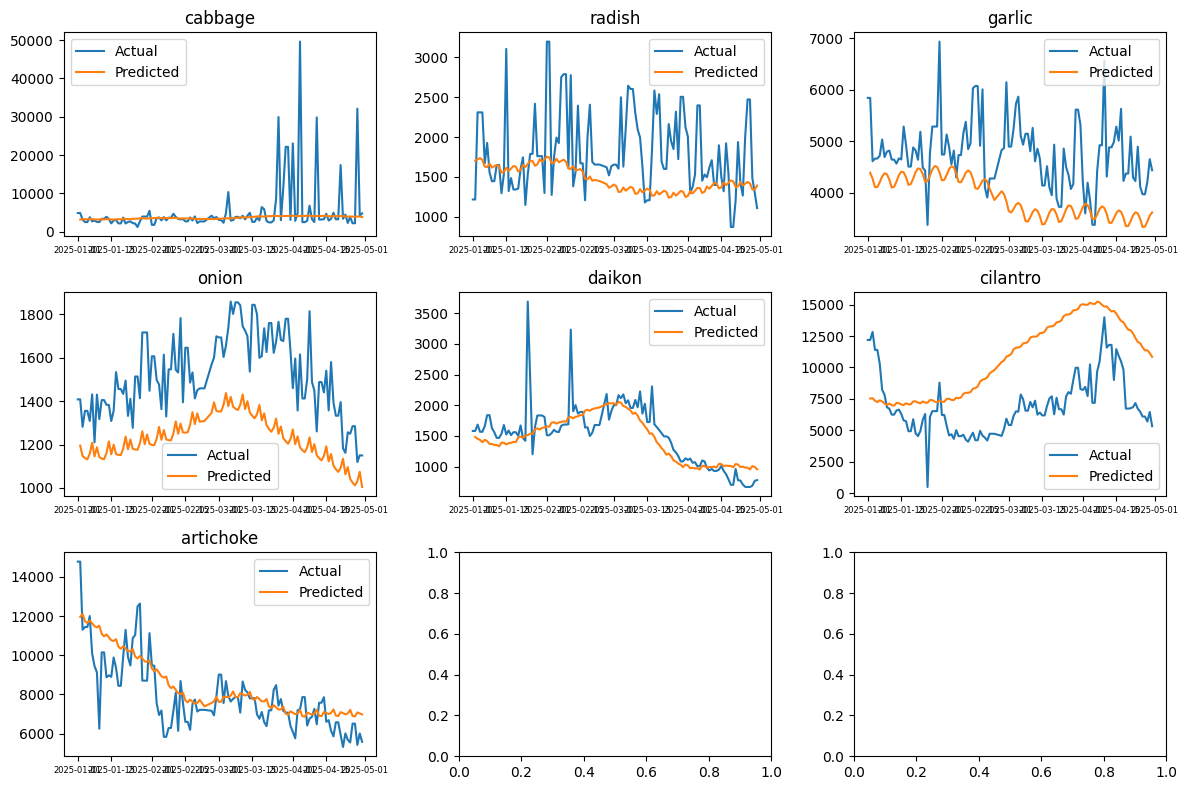

In [ ]:
# 픔목별 예측값 vs 실제값 시각화
num_rows = 3
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize = (12,8))
axes = axes.flatten()

# 품목 목록
products = ['cabbage', 'radish', 'garlic', 'onion', 'daikon', 'cilantro', 'artichoke']

for i, (prd, ax) in enumerate(zip(products, axes)):
    df = dfs[prd]
    ax.plot(df['date'], df[prd], label = 'Actual')
    ax.plot(df['date'], df[prd+'_pred'], label = 'Predicted')
    ax.set_title(prd)
    ax.legend()
    ax.tick_params(axis = 'x', labelsize = 6)

plt.tight_layout()
plt.show()

In [ ]:
prd = ['cabbage', 'radish', 'garlic', 'onion', 'daikon', 'cilantro', 'artichoke']
dfs = {}
for p in prd:
  dfs[p] =  test[['date', p, p+'_pred']]
  dfs[p]['gap'] = dfs[p][p] - dfs[p][p+'_pred']
  dfs[p]['abs_gap'] = abs(dfs[p][p] - dfs[p][p+'_pred'])
  dfs[p]['ape'] = dfs[p]['abs_gap'] / dfs[p][p]
  dfs[p]['ape_median'] = 1 - dfs[p]['ape'].median()

for p in prd:
  print(f"{p}: APE Median = {dfs[p]['ape_median'][0]}")

cabbage: APE Median = 0.7462382146210791
radish: APE Median = 0.8131553556553963
garlic: APE Median = 0.8421026097616047
onion: APE Median = 0.8072545167214795
daikon: APE Median = 0.8995937156706897
cilantro: APE Median = 0.29200948831779305
artichoke: APE Median = 0.9057506659964281


- Post Processing 진행하려 했지만 해당 데이터에는 휴일(일요일, 공휴일 등)의 데이터가 부재</br>또한 모든 농산물의 가격이 동일한 시기에 오르거나 내려가지 않고 따로따로 변동되는것으로 보아 크게 영향을 주는 event가 없다고 판단</br>단, 실제 값 그래프를 보면 알 수 있듯이 test dataset에 이상치가 존재한다는 사실을 인식 더 나은 분석을 위해 이상치를 해당 월의 평균으로 바꿔서 분석을 재진행

In [ ]:
def replace_outliers_iqr_monthly_avg(df, product_columns):
    """
    DataFrame의 지정된 컬럼들에서 IQR을 사용하여 이상치를 감지하고,
    이상치를 해당 월의 견고한 평균값(해당 월의 이상치를 제외한 값들의 평균)으로 대체합니다.

    Args:
        df (pd.DataFrame): 처리할 DataFrame. 'date' 컬럼을 포함해야 하며, datetime 형식이어야 함.
        product_columns (list): 이상치 처리를 수행할 컬럼명 리스트.

    Returns:
        pd.DataFrame: 이상치가 처리된 DataFrame.
    """
    df_processed = df.copy()

    if 'date' not in df_processed.columns:
        print("오류: DataFrame에 'date' 컬럼이 없습니다.")
        return df

    # 'date' 컬럼이 datetime 형식이 아니면 변환
    if not pd.api.types.is_datetime64_any_dtype(df_processed['date']):
        try:
            df_processed['date'] = pd.to_datetime(df_processed['date'])
        except Exception as e:
            print(f"오류: 'date' 컬럼을 datetime 형식으로 변환 중 문제 발생: {e}")
            return df

    # 연월 정보 추출 (groupby에 사용)
    df_processed['year_month'] = df_processed['date'].dt.to_period('M')

    for col in product_columns:
        if col not in df_processed.columns:
            print(f"경고: '{col}' 컬럼이 DataFrame에 없습니다. 이 컬럼은 건너뜁니다.")
            continue

        # 숫자형 데이터가 아니면 건너뛰기
        if not pd.api.types.is_numeric_dtype(df_processed[col]):
            print(f"경고: '{col}' 컬럼은 숫자형 데이터가 아닙니다. 이 컬럼은 건너뜁니다.")
            continue

        print(f"\n'{col}' 컬럼 이상치 처리 중...")

        # 1. IQR 및 경계값 계산
        Q1 = df_processed[col].quantile(0.25)
        Q3 = df_processed[col].quantile(0.75)
        IQR_val = Q3 - Q1

        # IQR이 0인 경우 (데이터가 모두 같거나, 변동성이 매우 작은 경우) 이상치 감지 무의미
        if IQR_val == 0:
            print(f"  '{col}' 컬럼의 IQR이 0입니다. 이상치 감지를 건너뜁니다.")
            continue

        lower_bound = Q1 - 1.5 * IQR_val
        upper_bound = Q3 + 1.5 * IQR_val

        # 2. 이상치 감지
        outlier_mask = (df_processed[col] < lower_bound) | (df_processed[col] > upper_bound)

        if not outlier_mask.any():
            print(f"  '{col}' 컬럼에서 이상치가 발견되지 않았습니다.")
            continue

        num_outliers = outlier_mask.sum()
        print(f"  '{col}' 컬럼에서 {num_outliers}개의 이상치 발견. (하한: {lower_bound:.2f}, 상한: {upper_bound:.2f})")

        # 3. 견고한 월별 평균 계산 준비
        #    이상치인 부분은 임시로 NaN으로 만들어 월별 평균 계산 시 제외되도록 함
        df_processed['temp_col_for_mean'] = df_processed[col].mask(outlier_mask)

        # 4. 견고한 월별 평균 계산 (이상치를 제외한 월별 평균)
        #    groupby 후 transform을 사용하면 원래 DataFrame의 인덱스를 유지하면서 평균값을 매핑하기 쉬움
        #    하지만, 각 월별로 평균을 구한 뒤 map을 사용하는 것이 더 명확할 수 있음
        monthly_robust_means_map = df_processed.groupby('year_month')['temp_col_for_mean'].mean()

        # 계산된 월별 평균을 원래 DataFrame의 각 행에 매핑
        df_processed['replacement_value'] = df_processed['year_month'].map(monthly_robust_means_map)

        # 5. 이상치 대체
        #    실제 이상치이고 & 해당 월의 견고한 평균이 계산되었을 경우에만 대체
        condition_to_replace = outlier_mask & df_processed['replacement_value'].notna()

        num_actually_replaced = condition_to_replace.sum()
        if num_actually_replaced > 0:
            df_processed.loc[condition_to_replace, col] = df_processed.loc[condition_to_replace, 'replacement_value']
            print(f"  {num_actually_replaced}개의 이상치를 해당 월의 견고한 평균값으로 대체했습니다.")

        # 대체되지 못한 이상치 (예: 해당 월의 모든 값이 이상치였던 경우)
        num_not_replaced = num_outliers - num_actually_replaced
        if num_not_replaced > 0:
            print(f"  {num_not_replaced}개의 이상치는 월별 견고한 평균값을 계산할 수 없어 대체되지 못했습니다 (원본 값 유지).")
            # 이런 경우, 추가적인 처리 (예: 전체 데이터의 중앙값/평균으로 대체 등)를 고려할 수 있음

        # 임시 컬럼 삭제
        df_processed.drop(columns=['temp_col_for_mean', 'replacement_value'], inplace=True)

    df_processed.drop(columns=['year_month'], inplace=True) # 작업 완료 후 연월 컬럼 삭제
    return df_processed


In [ ]:
product_price_columns = ['cabbage', 'radish', 'garlic', 'onion', 'daikon', 'cilantro', 'artichoke']

# 함수 실행 전 test_data의 복사본을 만들어서 원본을 보존하는 것이 좋아
test_data_for_outlier_treatment = test_filled.copy()
test_data_cleaned = replace_outliers_iqr_monthly_avg(test_data_for_outlier_treatment, product_price_columns)

print("\n이상치 처리 후 test_data (일부):")
print(test_data_cleaned.head())

# 처리 전후의 특정 컬럼 기술 통계 비교 (이상치 제거 효과 확인)
# 예: 배추(cabbage) 컬럼
if 'cabbage' in test_data.columns and 'cabbage' in test_data_cleaned.columns:
    print("\n'cabbage' 컬럼 처리 전 기술 통계:")
    print(test_data['cabbage'].describe())
    print("\n'cabbage' 컬럼 처리 후 기술 통계:")
    print(test_data_cleaned['cabbage'].describe())


'cabbage' 컬럼 이상치 처리 중...
  'cabbage' 컬럼에서 13개의 이상치 발견. (하한: 685.91, 상한: 5900.91)
  13개의 이상치를 해당 월의 견고한 평균값으로 대체했습니다.

'radish' 컬럼 이상치 처리 중...
  'radish' 컬럼에서 2개의 이상치 발견. (하한: 443.77, 상한: 3134.73)
  2개의 이상치를 해당 월의 견고한 평균값으로 대체했습니다.

'garlic' 컬럼 이상치 처리 중...
  'garlic' 컬럼에서 2개의 이상치 발견. (하한: 3234.74, 상한: 6204.22)
  2개의 이상치를 해당 월의 견고한 평균값으로 대체했습니다.

'onion' 컬럼 이상치 처리 중...
  'onion' 컬럼에서 이상치가 발견되지 않았습니다.

'daikon' 컬럼 이상치 처리 중...
  'daikon' 컬럼에서 2개의 이상치 발견. (하한: 0.29, 상한: 2932.45)
  2개의 이상치를 해당 월의 견고한 평균값으로 대체했습니다.

'cilantro' 컬럼 이상치 처리 중...
  'cilantro' 컬럼에서 9개의 이상치 발견. (하한: 1780.11, 상한: 11491.79)
  9개의 이상치를 해당 월의 견고한 평균값으로 대체했습니다.

'artichoke' 컬럼 이상치 처리 중...
  'artichoke' 컬럼에서 5개의 이상치 발견. (하한: 3443.56, 상한: 11863.00)
  5개의 이상치를 해당 월의 견고한 평균값으로 대체했습니다.

이상치 처리 후 test_data (일부):
        date  cabbage   radish   garlic    onion   daikon      cilantro  \
0 2025-01-01  4832.75  1217.56  5843.78  1408.03  1580.95   6769.851111   
1 2025-01-02  4832.75  1217.56  5843.78  1408.03  1580.95   6769.85

In [ ]:
# 예측 대상 df 생성
start_dt= '2025-01-01'
end_dt = '2025-12-31'
forecast_df_cleaned = pd.DataFrame({'date':pd.date_range(start = start_dt, end = end_dt)})
forecast_df_cleaned

,date
0,2025-01-01
1,2025-01-02
2,2025-01-03
3,2025-01-04
4,2025-01-05
...,...
360,2025-12-27
361,2025-12-28
362,2025-12-29
363,2025-12-30


In [ ]:
# 품목별 반복하면서 예측 후 저장

for col in train_filled.columns:
    if col != 'date':
        train_prophet = train_filled[['date', col]].rename(columns = {'date': 'ds', col: 'y'})

        model_prophet = Prophet()
        model_prophet.fit(train_prophet)

        future_dates = pd.DataFrame(pd.date_range(start = start_dt, end = end_dt), columns = ['ds'])
        forecast = model_prophet.predict(future_dates)
        forecast = forecast.round(2)
        forecast_df_cleaned[col + '_pred'] = forecast['yhat']

forecast_df_cleaned

DEBUG:cmdstanpy:input tempfile: /tmp/tmpc9sa_vdl/mcga7gb_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc9sa_vdl/z9ct2tyu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99260', 'data', 'file=/tmp/tmpc9sa_vdl/mcga7gb_.json', 'init=/tmp/tmpc9sa_vdl/z9ct2tyu.json', 'output', 'file=/tmp/tmpc9sa_vdl/prophet_modelm9m3e1ge/prophet_model-20250523045046.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:50:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:50:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc9sa_vdl/4q8x6o5g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc9sa_vdl/lonkbzj5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

,date,cabbage_pred,radish_pred,garlic_pred,onion_pred,daikon_pred,cilantro_pred,artichoke_pred
0,2025-01-01,3175.77,1750.71,4419.64,1155.94,1494.24,7705.94,11924.59
1,2025-01-02,3129.35,1705.14,4389.82,1195.09,1482.25,7530.95,11959.45
2,2025-01-03,3197.85,1720.79,4274.99,1147.09,1453.42,7552.30,12105.65
3,2025-01-04,3213.57,1736.83,4109.51,1137.58,1436.35,7355.17,11742.15
4,2025-01-05,3180.18,1712.30,4111.60,1131.83,1396.83,7247.10,11650.09
...,...,...,...,...,...,...,...,...
360,2025-12-27,4033.95,1961.59,3845.58,1075.01,825.41,10495.73,12004.92
361,2025-12-28,4017.11,1956.29,3837.18,1067.53,788.51,10339.84,12094.21
362,2025-12-29,4113.85,1889.47,3919.50,1091.32,827.34,10419.41,12384.78
363,2025-12-30,4108.85,1897.38,4020.18,1139.51,802.08,10265.10,12392.35


In [ ]:
merged_df = forecast_df_cleaned.merge(test_data_cleaned, on = 'date', how = 'left')
merged_df

,date,cabbage_pred,radish_pred,garlic_pred,onion_pred,daikon_pred,cilantro_pred,artichoke_pred,cabbage,radish,garlic,onion,daikon,cilantro,artichoke
0,2025-01-01,3175.77,1750.71,4419.64,1155.94,1494.24,7705.94,11924.59,4832.75,1217.56,5843.78,1408.03,1580.95,6769.851111,9694.394231
1,2025-01-02,3129.35,1705.14,4389.82,1195.09,1482.25,7530.95,11959.45,4832.75,1217.56,5843.78,1408.03,1580.95,6769.851111,9694.394231
2,2025-01-03,3197.85,1720.79,4274.99,1147.09,1453.42,7552.30,12105.65,3110.80,2309.07,4613.04,1281.47,1683.65,6769.851111,11304.910000
3,2025-01-04,3213.57,1736.83,4109.51,1137.58,1436.35,7355.17,11742.15,2466.66,2308.51,4664.59,1355.17,1567.71,11395.750000,11444.510000
4,2025-01-05,3180.18,1712.30,4111.60,1131.83,1396.83,7247.10,11650.09,2466.66,2308.51,4664.59,1355.17,1567.71,11395.750000,11444.510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2025-12-27,4033.95,1961.59,3845.58,1075.01,825.41,10495.73,12004.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN
361,2025-12-28,4017.11,1956.29,3837.18,1067.53,788.51,10339.84,12094.21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
362,2025-12-29,4113.85,1889.47,3919.50,1091.32,827.34,10419.41,12384.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN
363,2025-12-30,4108.85,1897.38,4020.18,1139.51,802.08,10265.10,12392.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# 품목별로 실제, 예측 값만 저장

prd = ['cabbage', 'radish', 'garlic', 'onion', 'daikon', 'cilantro', 'artichoke']
dfs = {}
for p in prd:
    dfs[p] = merged_df[['date', p, p+'_pred']]

print("DataFrame for garlic")
print(dfs['garlic'].head())

DataFrame for garlic
        date   garlic  garlic_pred
0 2025-01-01  5843.78      4419.64
1 2025-01-02  5843.78      4389.82
2 2025-01-03  4613.04      4274.99
3 2025-01-04  4664.59      4109.51
4 2025-01-05  4664.59      4111.60


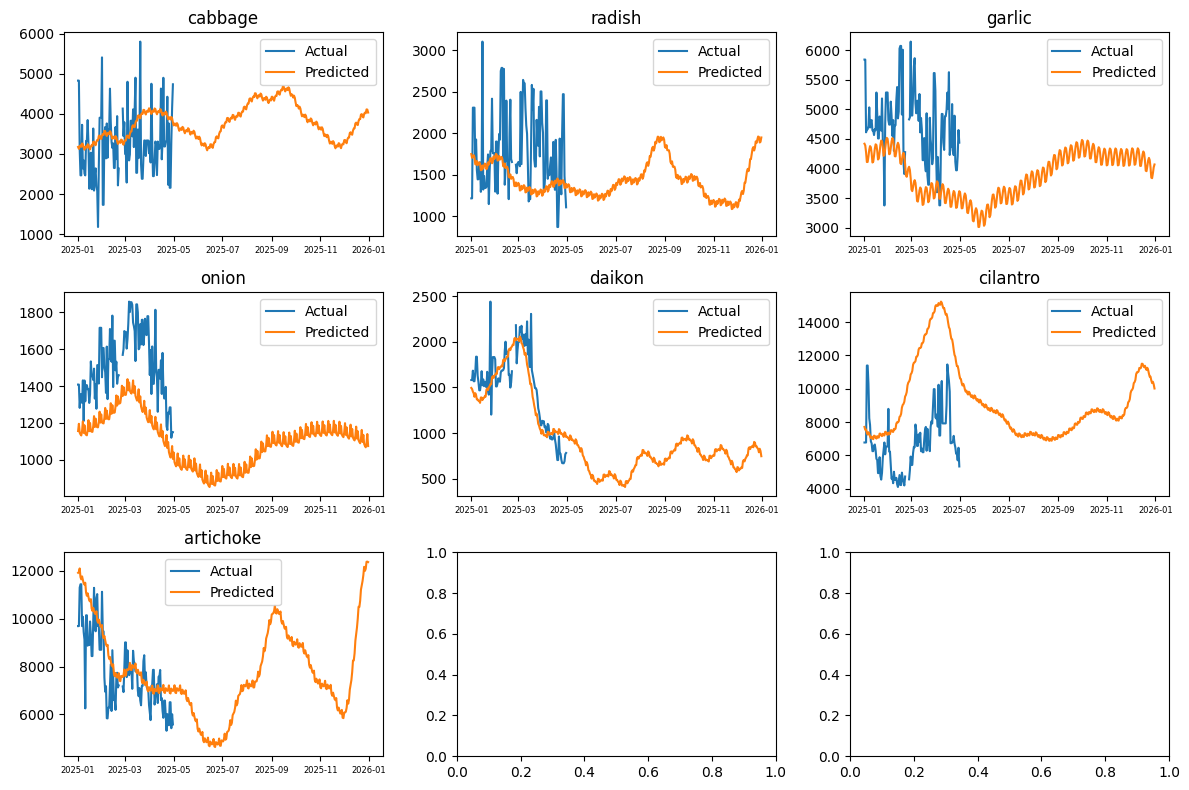

In [ ]:
# 픔목별 예측값 vs 실제값 시각화
num_rows = 3
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize = (12,8))
axes = axes.flatten()

# 품목 목록
products = ['cabbage', 'radish', 'garlic', 'onion', 'daikon', 'cilantro', 'artichoke']

for i, (prd, ax) in enumerate(zip(products, axes)):
    df = dfs[prd]
    ax.plot(df['date'], df[prd], label = 'Actual')
    ax.plot(df['date'], df[prd+'_pred'], label = 'Predicted')
    ax.set_title(prd)
    ax.legend()
    ax.tick_params(axis = 'x', labelsize = 6)

plt.tight_layout()
plt.show()

In [ ]:
prd = ['cabbage', 'radish', 'garlic', 'onion', 'daikon', 'cilantro', 'artichoke']
dfs = {}
for p in prd:
  dfs[p] =  test[['date', p, p+'_pred']]
  dfs[p]['gap'] = dfs[p][p] - dfs[p][p+'_pred']
  dfs[p]['abs_gap'] = abs(dfs[p][p] - dfs[p][p+'_pred'])
  dfs[p]['ape'] = dfs[p]['abs_gap'] / dfs[p][p]
  dfs[p]['ape_median'] = 1 - dfs[p]['ape'].median()

for p in prd:
  print(f"{p}: APE Median = {dfs[p]['ape_median'][0]}")

cabbage: APE Median = 0.7462382146210791
radish: APE Median = 0.8131553556553963
garlic: APE Median = 0.8421026097616047
onion: APE Median = 0.8072545167214795
daikon: APE Median = 0.8995937156706897
cilantro: APE Median = 0.29200948831779305
artichoke: APE Median = 0.9057506659964281


### Feature Engineering for ML

In [ ]:
# 편의를 위해 학습 데이터와 테스트 데이터를 concat를 사용해서 합치기
data = pd.concat([train_filled, test_data_cleaned]).reset_index(drop=True)

print(data.head())
print(data.tail())

        date  cabbage  radish   garlic    onion   daikon  cilantro  artichoke
0 2021-01-01   713.00  760.00  4182.76  1282.48  2163.33   3862.77   12340.35
1 2021-01-02   713.00  760.00  4182.76  1282.48  2163.33   3862.77   12340.35
2 2021-01-03   713.00  760.00  4182.76  1282.48  2163.33   3862.77   12340.35
3 2021-01-04  1946.90  708.50  4427.22  1381.92  2083.49   3539.80    8773.32
4 2021-01-05  1307.79  996.28  4731.48  1396.43  2316.91   3281.04   10148.78
           date   cabbage   radish   garlic    onion  daikon  cilantro  \
1573 2025-04-26  2156.310  2470.71  3970.21  1284.41  668.11   6097.55   
1574 2025-04-27  2156.310  2470.71  3970.21  1284.41  668.11   6097.55   
1575 2025-04-28  3310.745  1485.51  4212.23  1119.54  689.10   5698.70   
1576 2025-04-29  4154.870  1302.11  4651.40  1150.63  767.71   6454.00   
1577 2025-04-30  4740.450  1109.83  4438.43  1149.61  780.90   5330.21   

      artichoke  
1573    6511.69  
1574    6511.69  
1575    5424.83  
1576    6009.32

In [ ]:
def add_date_features(data):
  """
  dataset에 날짜와 관련된 feature를 생성
  args:
    dataset
  return:
    features 포함된 dataset
  """
  # 날짜 기반 파생변수 생성
  data['year'] = data['date'].dt.year
  data['month'] = data['date'].dt.month
  data['day'] = data['date'].dt.day
  data['day_of_week'] = data['date'].dt.dayofweek
  data['is_weekend'] = data['day_of_week'].isin([5, 6]).astype(int)

  # 공휴일 변수
  kr_holidays = holidays.KR(years = data['year'].unique())
  data['is_holiday'] = data['date'].isin(kr_holidays).astype(int)

  return data

In [ ]:
data = add_date_features(data)
data

,date,cabbage,radish,garlic,onion,daikon,cilantro,artichoke,year,month,day,day_of_week,is_weekend,is_holiday
0,2021-01-01,713.000,760.00,4182.76,1282.48,2163.33,3862.77,12340.35,2021,1,1,4,0,1
1,2021-01-02,713.000,760.00,4182.76,1282.48,2163.33,3862.77,12340.35,2021,1,2,5,1,0
2,2021-01-03,713.000,760.00,4182.76,1282.48,2163.33,3862.77,12340.35,2021,1,3,6,1,0
3,2021-01-04,1946.900,708.50,4427.22,1381.92,2083.49,3539.80,8773.32,2021,1,4,0,0,0
4,2021-01-05,1307.790,996.28,4731.48,1396.43,2316.91,3281.04,10148.78,2021,1,5,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1573,2025-04-26,2156.310,2470.71,3970.21,1284.41,668.11,6097.55,6511.69,2025,4,26,5,1,0
1574,2025-04-27,2156.310,2470.71,3970.21,1284.41,668.11,6097.55,6511.69,2025,4,27,6,1,0
1575,2025-04-28,3310.745,1485.51,4212.23,1119.54,689.10,5698.70,5424.83,2025,4,28,0,0,0
1576,2025-04-29,4154.870,1302.11,4651.40,1150.63,767.71,6454.00,6009.32,2025,4,29,1,0,0


In [ ]:
def add_lagging_feature(data, window=7):
  """
  예측값의 과거 t-1, .. t-n 까지의 데이터를 추가
  args:
    dataset,
    window = 7 as defaullt
  return:
    features 포함된 dataset
  """
  data = data.copy()

  products = ['cabbage', 'radish', 'garlic', 'onion', 'daikon', 'cilantro', 'artichoke']
  for product in products:
    data[f'{product}_lag_{window}'] = data[product].shift(window)
  return data

In [ ]:
data = add_lagging_feature(data, window = 7)
data = add_lagging_feature(data, window = 14)
data.head(30)

,date,cabbage,radish,garlic,onion,daikon,cilantro,artichoke,year,month,...,daikon_lag_7,cilantro_lag_7,artichoke_lag_7,cabbage_lag_14,radish_lag_14,garlic_lag_14,onion_lag_14,daikon_lag_14,cilantro_lag_14,artichoke_lag_14
0,2021-01-01,713.00,760.00,4182.76,1282.48,2163.33,3862.77,12340.35,2021,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-01-02,713.00,760.00,4182.76,1282.48,2163.33,3862.77,12340.35,2021,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-01-03,713.00,760.00,4182.76,1282.48,2163.33,3862.77,12340.35,2021,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-01-04,1946.90,708.50,4427.22,1381.92,2083.49,3539.80,8773.32,2021,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-01-05,1307.79,996.28,4731.48,1396.43,2316.91,3281.04,10148.78,2021,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2021-01-06,1942.60,1012.55,4420.99,1484.83,2555.18,3440.97,11108.13,2021,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2021-01-07,1872.97,694.47,4080.54,1488.01,2740.90,3018.87,11615.35,2021,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2021-01-08,2091.30,718.38,4562.64,1423.30,2358.48,3183.15,7231.71,2021,1,...,2163.33,3862.77,12340.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2021-01-09,1786.48,804.76,4579.95,1427.90,2388.88,2152.83,6631.57,2021,1,...,2163.33,3862.77,12340.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2021-01-10,1786.48,804.76,4579.95,1427.90,2388.88,2152.83,6631.57,2021,1,...,2163.33,3862.77,12340.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
def add_rolling_mean(data, window = 7):
  """
  7일간의 품목의 가격의 avg와 std를 구함
  변동성이 큰 가격을 갖는 품목에 대한 rolling mean을 계산
  args:
    dataset,
    window = 7 as default
  return:
    features 포함된 dataset
  """
  products = ['cabbage', 'radish', 'garlic', 'onion', 'daikon', 'cilantro', 'artichoke']

  for product in products:
      if product in data.columns:
         data[f'{product}_rolling_mean'] = data[product].rolling(window = window ,min_periods = 1).mean()
         data[f'{product}_rolling_std'] = data[product].rolling(window = window, min_periods = 1).std()

  return data

In [ ]:
data = add_rolling_mean(data)
data

,date,cabbage,radish,garlic,onion,daikon,cilantro,artichoke,year,month,...,garlic_rolling_mean,garlic_rolling_std,onion_rolling_mean,onion_rolling_std,daikon_rolling_mean,daikon_rolling_std,cilantro_rolling_mean,cilantro_rolling_std,artichoke_rolling_mean,artichoke_rolling_std
0,2021-01-01,713.000,760.00,4182.76,1282.48,2163.33,3862.77,12340.35,2021,1,...,4182.760000,NaN,1282.480000,NaN,2163.330000,NaN,3862.770000,NaN,12340.350000,NaN
1,2021-01-02,713.000,760.00,4182.76,1282.48,2163.33,3862.77,12340.35,2021,1,...,4182.760000,0.000000,1282.480000,0.000000,2163.330000,0.000000,3862.770000,0.000000,12340.350000,0.000000
2,2021-01-03,713.000,760.00,4182.76,1282.48,2163.33,3862.77,12340.35,2021,1,...,4182.760000,0.000000,1282.480000,0.000000,2163.330000,0.000000,3862.770000,0.000000,12340.350000,0.000000
3,2021-01-04,1946.900,708.50,4427.22,1381.92,2083.49,3539.80,8773.32,2021,1,...,4243.875000,122.230000,1307.340000,49.720000,2143.370000,39.920000,3782.027500,161.485000,11448.592500,1783.515000
4,2021-01-05,1307.790,996.28,4731.48,1396.43,2316.91,3281.04,10148.78,2021,1,...,4341.396000,242.398137,1325.158000,58.663996,2178.078000,84.961351,3681.830000,264.113137,11188.630000,1650.332337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1573,2025-04-26,2156.310,2470.71,3970.21,1284.41,668.11,6097.55,6511.69,2025,4,...,4424.548571,412.866548,1266.124286,81.414174,752.140000,102.563520,6685.188571,329.806906,5942.805714,473.711831
1574,2025-04-27,2156.310,2470.71,3970.21,1284.41,668.11,6097.55,6511.69,2025,4,...,4366.861429,447.833391,1259.217143,76.735145,747.091429,106.166193,6595.185714,395.696617,5933.012857,458.812408
1575,2025-04-28,3310.745,1485.51,4212.23,1119.54,689.10,5698.70,5424.83,2025,4,...,4241.371429,314.409712,1219.795714,65.052241,708.145714,48.832646,6444.308571,509.624803,5859.415714,497.215251
1576,2025-04-29,4154.870,1302.11,4651.40,1150.63,767.71,6454.00,6009.32,2025,4,...,4291.662857,351.230447,1215.250000,69.083661,706.558571,46.265863,6388.497143,478.939257,5958.121429,436.823755


In [ ]:
def split_data(data, std_date = '2025-01-01'):
  """
  Feature Engineering을 편하게 하기 위해 합쳤던 dataset을 다시 나누는 과정
  특정 날짜(test_data의 시작 날짜)를 기준으로 train, test dataset을 나누기
  args:
    dataset
  return:
    train, test dataset
  """
  data = data.dropna()
  train_data = data.query("date < @std_date")
  test_data = data.query("date >= @std_date")

  print("Train set shape:", train_data.shape)
  print("Test set shape:", test_data.shape)
  return train_data, test_data

In [ ]:
train_data, test_data = split_data(data)

Train set shape: (1447, 42)
Test set shape: (117, 42)


In [ ]:
train_data.head()

,date,cabbage,radish,garlic,onion,daikon,cilantro,artichoke,year,month,...,garlic_rolling_mean,garlic_rolling_std,onion_rolling_mean,onion_rolling_std,daikon_rolling_mean,daikon_rolling_std,cilantro_rolling_mean,cilantro_rolling_std,artichoke_rolling_mean,artichoke_rolling_std
14,2021-01-15,2443.19,1033.78,4207.11,1598.92,2872.57,2961.68,8913.78,2021,1,...,4659.868571,559.287774,1594.778571,124.268871,2644.498571,226.174800,2895.017143,529.949675,8529.215714,1420.380439
15,2021-01-16,1373.96,765.07,4145.83,1694.69,3099.35,3404.70,9440.00,2021,1,...,4597.851429,592.697601,1632.891429,103.780394,2745.994286,250.456100,3073.855714,441.612983,8930.420000,1169.515437
16,2021-01-17,1373.96,765.07,4145.83,1694.69,3099.35,3404.70,9440.00,2021,1,...,4535.834286,617.093011,1671.004286,52.044322,2847.490000,224.198401,3252.694286,185.929689,9331.624286,585.207150
17,2021-01-18,1783.54,836.28,4679.05,1674.31,3034.07,3564.27,10624.43,2021,1,...,4665.117143,517.695248,1680.051429,44.882674,2925.671429,165.084830,3284.775714,219.743790,9347.458571,622.809902
18,2021-01-19,1792.25,927.25,4376.39,1518.97,3068.72,3343.26,8700.73,2021,1,...,4538.815714,451.897569,1651.480000,71.653113,2979.554286,134.684718,3309.914286,214.055244,9310.812857,656.245355


In [ ]:
test_data

,date,cabbage,radish,garlic,onion,daikon,cilantro,artichoke,year,month,...,garlic_rolling_mean,garlic_rolling_std,onion_rolling_mean,onion_rolling_std,daikon_rolling_mean,daikon_rolling_std,cilantro_rolling_mean,cilantro_rolling_std,artichoke_rolling_mean,artichoke_rolling_std
1461,2025-01-01,4832.750,1217.56,5843.78,1408.03,1580.95,6769.851111,9694.394231,2025,1,...,4948.581429,566.033921,1262.794286,90.321821,1519.624286,110.069718,10601.163016,2016.539023,11036.622033,715.275452
1462,2025-01-02,4832.750,1217.56,5843.78,1408.03,1580.95,6769.851111,9694.394231,2025,1,...,5038.101429,657.714016,1298.051429,92.217888,1532.967143,111.188966,9946.626032,2432.948395,10835.838352,874.174766
1463,2025-01-03,3110.800,2309.07,4613.04,1281.47,1683.65,6769.851111,11304.910000,2025,1,...,5029.364286,663.732497,1309.578571,82.571102,1558.698571,123.411203,9438.289048,2697.309601,10814.418352,858.169583
1464,2025-01-04,2466.660,2308.51,4664.59,1355.17,1567.71,11395.750000,11444.510000,2025,1,...,5078.990000,612.631283,1318.495714,83.811983,1583.207143,100.694610,9253.181905,2471.885037,10831.439780,871.077514
1465,2025-01-05,2466.660,2308.51,4664.59,1355.17,1567.71,11395.750000,11444.510000,2025,1,...,5128.615714,551.676558,1327.412857,83.936727,1607.715714,60.389739,9068.074762,2205.674800,10848.461209,883.414401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1573,2025-04-26,2156.310,2470.71,3970.21,1284.41,668.11,6097.550000,6511.690000,2025,4,...,4424.548571,412.866548,1266.124286,81.414174,752.140000,102.563520,6685.188571,329.806906,5942.805714,473.711831
1574,2025-04-27,2156.310,2470.71,3970.21,1284.41,668.11,6097.550000,6511.690000,2025,4,...,4366.861429,447.833391,1259.217143,76.735145,747.091429,106.166193,6595.185714,395.696617,5933.012857,458.812408
1575,2025-04-28,3310.745,1485.51,4212.23,1119.54,689.10,5698.700000,5424.830000,2025,4,...,4241.371429,314.409712,1219.795714,65.052241,708.145714,48.832646,6444.308571,509.624803,5859.415714,497.215251
1576,2025-04-29,4154.870,1302.11,4651.40,1150.63,767.71,6454.000000,6009.320000,2025,4,...,4291.662857,351.230447,1215.250000,69.083661,706.558571,46.265863,6388.497143,478.939257,5958.121429,436.823755


### ML 모델 구축 및 성능 비교

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
# 예측 대상 품목 리스트
products = ['cabbage', 'radish', 'garlic', 'onion', 'daikon', 'cilantro', 'artichoke']

# Define the target and features
features = ['year', 'month', 'day', 'day_of_week', 'is_weekend', 'is_holiday'] + \
           [f'{product}_lag_7' for product in products ] + \
           [f'{product}_lag_14' for product in products] + \
           [f'{product}_rolling_mean' for product in products] + \
           [f'{product}_rolling_std' for product in products]

targets = ['cabbage', 'radish', 'garlic', 'onion', 'daikon', 'cilantro', 'artichoke']

- ML 모델들을 선언
  - Ridge
  - RandomForestRegressor
  - LGBM
  - XGBoost
  - MLP

In [ ]:
from sklearn.pipeline import Pipeline
import sklearn.preprocessing as preprocessing
from sklearn.preprocessing import StandardScaler
models = {
    'Ridge' : Pipeline([
        ('scaler', StandardScaler()),  # Ridge 앞에 StandardScaler 추가
        ('ridge_model', Ridge(alpha = 10.0))
    ]),
    'RandomForestRegressor': RandomForestRegressor(),
    'LGBM': LGBMRegressor(),
    'XGBoost': XGBRegressor(),
    'MLP': MLPRegressor(hidden_layer_sizes = (100, 50), max_iter = 500)
}

def train_models(train_data, targets, features, models):
    predictions = {model_name : {} for model_name in models}
    for model_name, model in models.items():
        for target in targets:
            model.fit(train_data[features], train_data[target])
            predictions[model_name][target] = model.predict(test_data[features])
    return predictions

In [ ]:
predictions = train_models(train_data, targets, features, models)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000684 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7199
[LightGBM] [Info] Number of data points in the train set: 1447, number of used features: 34
[LightGBM] [Info] Start training from score 2434.115151
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000673 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7199
[LightGBM] [Info] Number of data points in the train set: 1447, number of used features: 34
[LightGBM] [Info] Start training from score 984.827560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000950 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7199
[LightGBM] [Info] Number of data points in the train set: 1447, number of used features: 34
[LightGBM] [Info] Start t

In [ ]:
predictions

{'Ridge': {'cabbage': array([3179.98468235, 3358.17123446, 3166.17516959, 3211.84486926,
         3115.41863308, 3371.72406134, 3373.72769862, 3124.33229077,
         2766.93822914, 2479.06458623, 2621.11959225, 2704.44574089,
         2934.86323621, 2941.50177637, 2854.87913696, 2890.20191653,
         3232.33717944, 2915.75352925, 2726.71046558, 2789.24507864,
         2695.05676299, 2698.80462516, 2649.88060803, 2465.03835477,
         2568.43541193, 2501.51044537, 2487.50699566, 2639.49521258,
         2960.89848359, 3086.59569641, 3330.34649212, 3112.66547559,
         3167.88964586, 3338.86238872, 3341.95309782, 3121.33247493,
         3031.80100967, 2609.64594989, 3064.09191006, 3222.57726857,
         3579.17099415, 3632.94401631, 3643.97268609, 3577.99241372,
         3532.32764233, 3570.4726416 , 3409.891674  , 3208.92747117,
         3074.52988603, 3255.15845991, 2968.1311194 , 3082.74770992,
         3131.01706303, 3331.66345596, 3288.95591214, 3394.78867035,
         3257.

In [ ]:
# 원하는 모델과 원하는 target을 지정할 수 있음
predictions['LGBM']['onion']

array([1273.78395569, 1291.80493267, 1284.90240773, 1295.83758642,
       1300.06687793, 1316.48849335, 1409.00524758, 1311.39243363,
       1307.3591454 , 1324.20753459, 1336.78195634, 1363.7711146 ,
       1321.36534707, 1381.82960725, 1337.37871839, 1373.84381817,
       1410.53222477, 1375.51716562, 1398.1434257 , 1451.13180789,
       1416.85485179, 1391.88702773, 1457.16126136, 1371.48964324,
       1410.13517643, 1438.29106411, 1348.81072292, 1424.83964157,
       1442.65056429, 1506.34308728, 1515.04342807, 1499.31388828,
       1458.51203216, 1527.08231021, 1587.22219718, 1493.80514071,
       1431.95796478, 1409.34819746, 1416.37051113, 1437.65466575,
       1434.93316645, 1418.02105088, 1549.71622234, 1597.66484901,
       1563.16589111, 1565.40614204, 1558.06104276, 1614.21054438,
       1630.18225038, 1519.6530351 , 1429.38242673, 1408.56476669,
       1457.52023767, 1465.88209045, 1448.75658062, 1434.71907908,
       1587.08843272, 1596.95506748, 1538.707394  , 1587.63593

In [ ]:
def create_predictions_df(test_data, predictions, targets):
  test_data_predictions = test_data.copy()
  for model_name, model_preds in predictions.items():
    for target in targets:
      test_data_predictions[f'{target}_pred_{model_name}'] = model_preds[target]
  return test_data_predictions

In [ ]:
test_data_predictions = create_predictions_df(test_data, predictions, targets)

In [ ]:
test_data_predictions

,date,cabbage,radish,garlic,onion,daikon,cilantro,artichoke,year,month,...,daikon_pred_XGBoost,cilantro_pred_XGBoost,artichoke_pred_XGBoost,cabbage_pred_MLP,radish_pred_MLP,garlic_pred_MLP,onion_pred_MLP,daikon_pred_MLP,cilantro_pred_MLP,artichoke_pred_MLP
1461,2025-01-01,4832.750,1217.56,5843.78,1408.03,1580.95,6769.851111,9694.394231,2025,1,...,1543.269165,8145.834961,11092.084961,2787.842580,1540.195925,5357.792299,1377.751151,1789.441223,9841.685280,11129.987482
1462,2025-01-02,4832.750,1217.56,5843.78,1408.03,1580.95,6769.851111,9694.394231,2025,1,...,1554.871582,9351.745117,10798.774414,3531.000834,1435.444172,5203.308481,1278.852823,1815.295945,8917.318679,10583.566564
1463,2025-01-03,3110.800,2309.07,4613.04,1281.47,1683.65,6769.851111,11304.910000,2025,1,...,1619.692017,8687.791992,10640.633789,2653.344795,1753.486822,5079.646092,1467.570260,1869.549166,8632.836218,11070.800937
1464,2025-01-04,2466.660,2308.51,4664.59,1355.17,1567.71,11395.750000,11444.510000,2025,1,...,1651.132568,7396.851074,9945.751953,3294.236286,1544.223264,5080.265768,1321.530870,1879.615761,7687.419116,11045.716512
1465,2025-01-05,2466.660,2308.51,4664.59,1355.17,1567.71,11395.750000,11444.510000,2025,1,...,1723.485596,6855.885742,9878.093750,3208.260641,1629.667072,5104.018318,1366.760688,1900.280427,7517.795861,10985.536604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1573,2025-04-26,2156.310,2470.71,3970.21,1284.41,668.11,6097.550000,6511.690000,2025,4,...,1024.858398,6439.269043,6495.508301,3164.317255,1444.981899,4257.621069,1240.253096,1162.023630,6859.006294,5612.294189
1574,2025-04-27,2156.310,2470.71,3970.21,1284.41,668.11,6097.550000,6511.690000,2025,4,...,1005.783081,6642.098145,6107.380371,3074.186827,1628.836309,4207.909352,1268.384628,1169.807343,6804.605175,5611.734811
1575,2025-04-28,3310.745,1485.51,4212.23,1119.54,689.10,5698.700000,5424.830000,2025,4,...,988.825439,6593.750977,6032.427734,3339.171150,1657.162292,4217.681581,1288.922806,1061.982312,6712.557059,5944.165867
1576,2025-04-29,4154.870,1302.11,4651.40,1150.63,767.71,6454.000000,6009.320000,2025,4,...,1038.765015,5836.099609,6573.880371,3552.105040,1747.864872,4143.573186,1232.227643,1117.527137,6460.905126,6229.484871


In [ ]:
def evaluate_predictions(test_data_predictions, targets):
    MdAPEs = {}
    for target in targets:
      for model_name in test_data_predictions.columns:
        if target+"_pred" in model_name:
          APE_col = f'{target}_APE_{model_name.split("_")[2]}'
          test_data_predictions[APE_col] = np.abs((test_data_predictions[target] - test_data_predictions[model_name]) / test_data_predictions[target])
          MdAPE = test_data_predictions[APE_col].median()
          MdAPEs[f'{target}_{model_name.split("_")[2]}'] = 1 - round(MdAPE, 6)

    return pd.DataFrame(list(MdAPEs.items()), columns = ['product_model', 'MdAPE'])

In [ ]:
metrics = evaluate_predictions(test_data_predictions, targets)
metrics[['product', 'model']] = metrics['product_model'].str.split('_', expand = True)

In [ ]:
metrics.head()

,product_model,MdAPE,product,model
0,cabbage_Ridge,0.848624,cabbage,Ridge
1,cabbage_RandomForestRegressor,0.844362,cabbage,RandomForestRegressor
2,cabbage_LGBM,0.835879,cabbage,LGBM
3,cabbage_XGBoost,0.807586,cabbage,XGBoost
4,cabbage_MLP,0.843837,cabbage,MLP


In [ ]:
# Visualize predictions
def plot_predictions(test_data_predictions, targets):
  num_rows = 3
  num_cols = 3
  fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 12))
  axes = axes.flatten()

  for i, target in enumerate(targets):
    ax = axes[i]
    ax.plot(test_data_predictions['date'], test_data_predictions[target], label = 'Actual')
    for model_name in models.keys():
      ax.plot(test_data_predictions['date'], test_data_predictions[f'{target}_pred_{model_name}'], label=f'Predicted ({model_name})')
    ax.set_title(target)
    ax.legend()
    ax.tick_params(axis='x', labelsize=6)

  plt.tight_layout()
  plt.show()

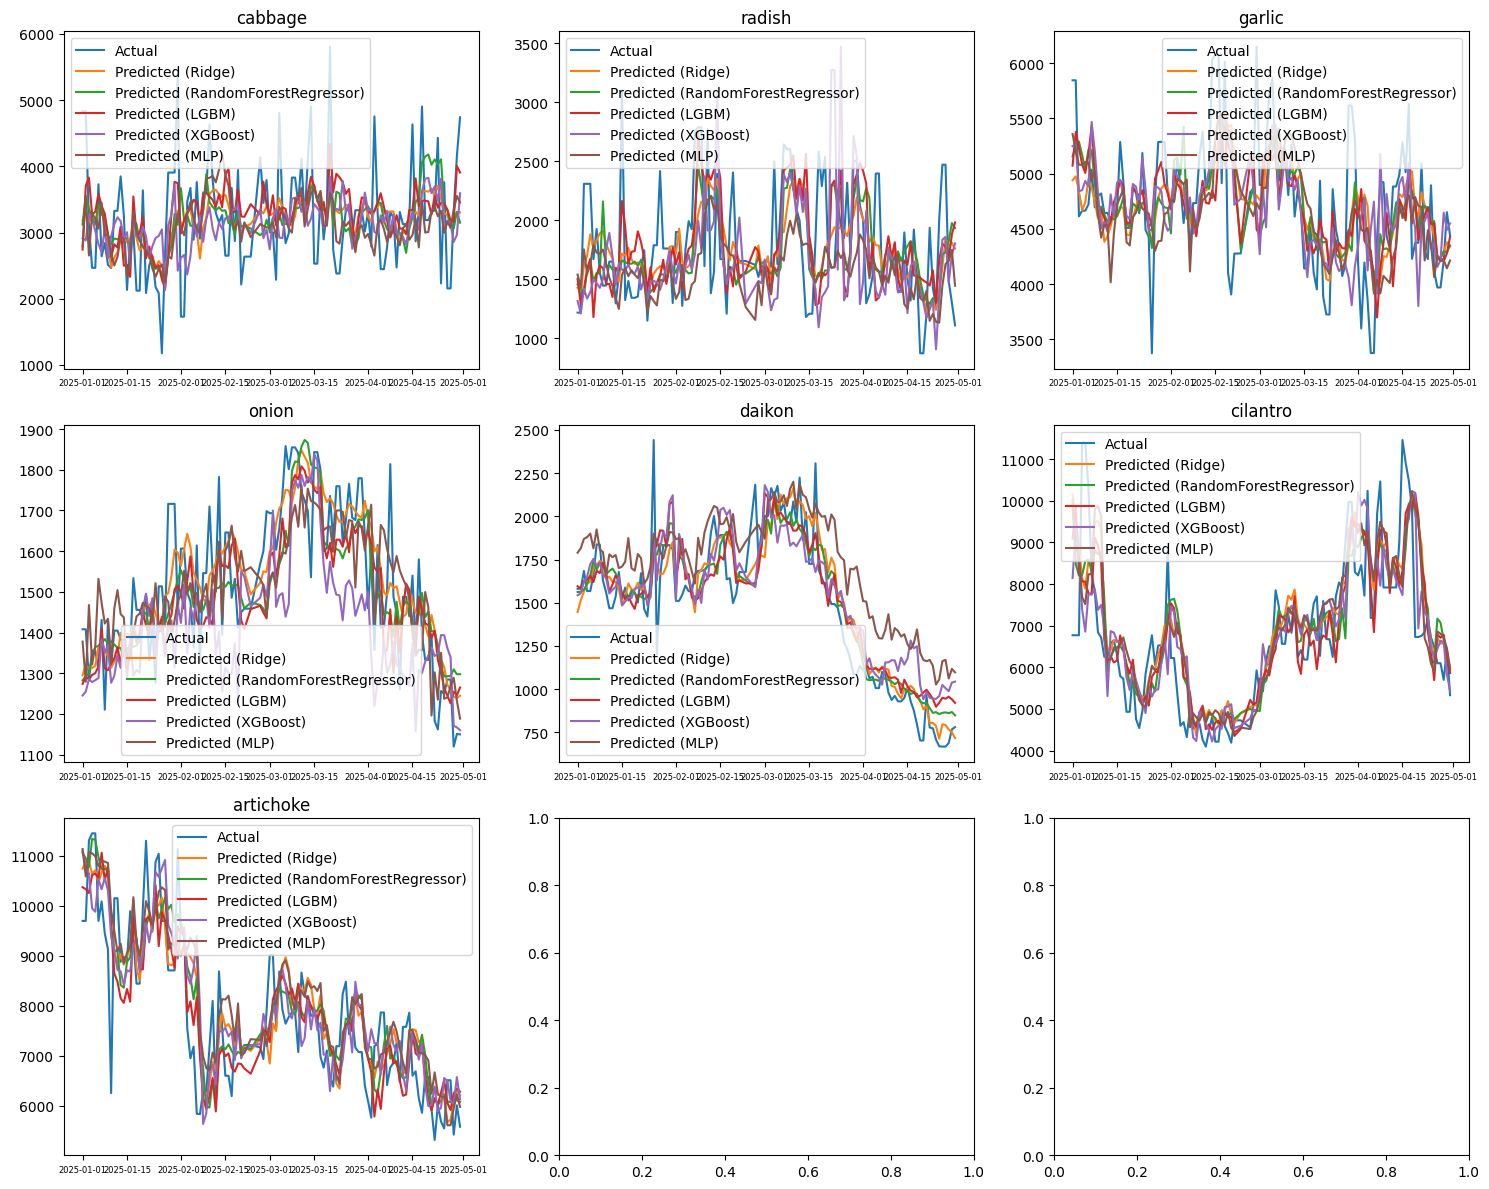

In [ ]:
plot_predictions(test_data_predictions, targets)

In [ ]:
from sklearn.base import clone # scikit-learn 모델 복제를 위해 임포트

feature_means_for_filling = train_data.mean()

trained_models = {}
for model_name, model_blueprint in models.items():
    trained_models[model_name] = {}
    print(f"  모델 학습: {model_name}")
    for target in targets:
        model_instance = clone(model_blueprint)
        # 만약 clone이 작동하지 않는 커스텀 모델이라면, model_instance = type(model_blueprint)() 등으로 새로 생성해야 함

        print(f"    '{target}' 학습 중...")
        model_instance.fit(train_data[features], train_data[target])
        trained_models[model_name][target] = model_instance

history = pd.concat([
    train_data[['date'] + targets],
    test_data[test_data['date'] <= pd.to_datetime('2025-04-30')][['date'] + targets]
]).drop_duplicates(subset = ['date'], keep = 'last').sort_values(by = 'date').reset_index(drop = True)

future_sd = pd.to_datetime('2025-05-01')
future_ed = pd.to_datetime('2025-12-31')
future_range = pd.date_range(start = future_sd, end = future_ed)


  모델 학습: Ridge
    'cabbage' 학습 중...
    'radish' 학습 중...
    'garlic' 학습 중...
    'onion' 학습 중...
    'daikon' 학습 중...
    'cilantro' 학습 중...
    'artichoke' 학습 중...
  모델 학습: RandomForestRegressor
    'cabbage' 학습 중...
    'radish' 학습 중...
    'garlic' 학습 중...
    'onion' 학습 중...
    'daikon' 학습 중...
    'cilantro' 학습 중...
    'artichoke' 학습 중...
  모델 학습: LGBM
    'cabbage' 학습 중...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000656 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7199
[LightGBM] [Info] Number of data points in the train set: 1447, number of used features: 34
[LightGBM] [Info] Start training from score 2434.115151
    'radish' 학습 중...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000689 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7199
[LightGBM] [Info] Number of data points in the train 

In [ ]:

all_models_output_predictions = {}

print("미래(5월~12월) 가격, 모델별 독립적 반복 예측 시작 (사용자 변수명 적용)...")

# trained_models 딕셔너리에서 모델 타입(model_name_iter)과 해당 타입에 속한 타겟별 모델들(per_target_fitted_models_iter)을 가져옴
for model_name_iter, per_target_fitted_models_iter in trained_models.items():
    print(f"\n '{model_name_iter}' 모델 타입에 대한 미래 예측 생성 중...")

    # 각 모델 타입은 동일한 초기 'history'로 시작하지만,
    # 'current_history_for_this_model'은 각 모델 타입별로 독립적으로 업데이트됨
    current_history_for_this_model = history.copy() # 사용자의 'history' 변수 사용

    # 현재 모델 타입(model_name_iter)의 일별 예측 결과를 저장할 리스트
    single_model_type_predictions_list = []

    # 사용자의 'future_range' (2025년 5월 1일 ~ 12월 31일)를 순회
    for pred_date in future_range:

        # a. 현재 날짜(pred_date)에 대한 피처 생성
        #    새로운 날짜에 대한 행을 만들고, target 값들은 NaN으로 초기화
        new_row_for_features = pd.DataFrame({'date': [pred_date]})
        for target_col in targets: # 사용자의 'targets' 리스트 사용
            new_row_for_features[target_col] = np.nan

        # 피처 생성을 위해 'current_history_for_this_model'의 마지막 30일치 데이터와 새 날짜 행을 결합
        data_for_feature_eng = pd.concat([current_history_for_this_model.tail(30), new_row_for_features], ignore_index=True)

        # 사용자의 피처 엔지니어링 함수들을 순서대로 적용
        features_eng_temp = add_date_features(data_for_feature_eng)
        features_eng_temp = add_lagging_feature(features_eng_temp, window=7)
        features_eng_temp = add_lagging_feature(features_eng_temp, window=14)
        features_eng_temp = add_rolling_mean(features_eng_temp, window=7) # 사용자의 함수명 'add_rolling_mean' 사용


        # 현재 날짜(pred_date)에 해당하는 피처 행을 추출 (사용자의 'features' 리스트 사용)
        current_features_for_pred = features_eng_temp.iloc[-1:][features]


        # 피처에 NaN 값이 있는지 확인 (반복 예측 초기에 발생 가능)
        if current_features_for_pred.isnull().values.any():
            print(f"    경고: {model_name_iter} - {pred_date.strftime('%Y-%m-%d')} 피처에 NaN 포함. 학습 데이터 평균으로 대체 시도.")
            for col in current_features_for_pred.columns: # features 리스트에 있는 컬럼들
                if current_features_for_pred[col].isnull().any(): # 해당 피처 컬럼에 NaN이 있다면
                    if col in feature_means_for_filling: # 해당 피처의 평균값이 저장되어 있다면
                        current_features_for_pred[col] = current_features_for_pred[col].fillna(feature_means_for_filling[col])
                    else:
                        # 만약의 경우, 평균값이 없는 피처라면 0이나 다른 값으로 채움 (이런 경우는 거의 없어야 함)
                        print(f"      경고: 피처 '{col}'의 평균값이 없어 NaN을 0으로 대체합니다.")
                        current_features_for_pred[col] = current_features_for_pred[col].fillna(0)

            # NaN 채우기 후에도 여전히 NaN이 있는지 다시 한번 확인 (디버깅용)
            if current_features_for_pred.isnull().values.any():
                 print(f"      심각한 경고: NaN 채우기 후에도 {model_name_iter} - {pred_date.strftime('%Y-%m-%d')} 피처에 여전히 NaN 존재!")


        # b. 현재 모델 타입(model_name_iter)의 학습된 모델들을 사용해 각 타겟별 가격 예측
        #    daily_predictions_for_this_model는 현재 날짜, 현재 모델 타입의 모든 타겟에 대한 예측값을 담음
        daily_predictions_for_this_model = {'date': pred_date}

        for target_col in targets: # 사용자의 'targets' 리스트 사용
            # per_target_fitted_models_iter에서 현재 모델 타입과 타겟에 맞는 학습된 모델을 가져옴
            model_to_predict_with = per_target_fitted_models_iter[target_col]

            if current_features_for_pred.empty or current_features_for_pred.isnull().all().all():
                pred_val = np.nan
                print(f"      피처 부족/NaN으로 {model_name_iter} - {target_col} ({pred_date.strftime('%Y-%m-%d')}) 예측 불가")
            else:
                try:
                    pred_val = model_to_predict_with.predict(current_features_for_pred)[0]
                except Exception as e:
                    print(f"      예측 오류 발생 {model_name_iter} - {target_col} ({pred_date.strftime('%Y-%m-%d')}): {e}")
                    pred_val = np.nan # 오류 발생 시 NaN으로 처리

            # 예측된 값을 저장 (컬럼명은 원래 농산물 이름으로, history 업데이트에 사용됨)
            daily_predictions_for_this_model[target_col] = pred_val

        # 현재 모델 타입의 하루치 예측 결과를 리스트에 추가
        single_model_type_predictions_list.append(daily_predictions_for_this_model)

        # c. 다음 반복을 위해 'current_history_for_this_model'을 현재 모델의 예측값으로 업데이트
        #    new_history_row_df는 'date'와 모든 'targets'에 대한 예측값을 포함
        new_history_row_df = pd.DataFrame([daily_predictions_for_this_model])

        current_history_for_this_model = pd.concat([
            current_history_for_this_model,
            new_history_row_df
        ], ignore_index=True)

    # 현재 모델 타입(model_name_iter)의 모든 미래 예측 결과를 DataFrame으로 변환하여 최종 딕셔너리에 저장
    all_models_output_predictions[model_name_iter] = pd.DataFrame(single_model_type_predictions_list)

print("\n모든 모델 타입에 대한 미래 가격, 모델별 독립적 반복 예측 완료.")


미래(5월~12월) 가격, 모델별 독립적 반복 예측 시작 (사용자 변수명 적용)...

 'Ridge' 모델 타입에 대한 미래 예측 생성 중...

 'RandomForestRegressor' 모델 타입에 대한 미래 예측 생성 중...

 'LGBM' 모델 타입에 대한 미래 예측 생성 중...

 'XGBoost' 모델 타입에 대한 미래 예측 생성 중...

 'MLP' 모델 타입에 대한 미래 예측 생성 중...

모든 모델 타입에 대한 미래 가격, 모델별 독립적 반복 예측 완료.


In [ ]:
import math

history_2025 = history[history['date'] >= pd.to_datetime('2025-01-01')].copy()

def create_plotting_dataframe(history_df, all_model_preds_dict, target_cols):
    """
    시각화를 위해 과거 실제값과 여러 모델의 미래 예측값을 하나의 DataFrame으로 합칩니다.

    Args:
        history_df (pd.DataFrame): 'date' 컬럼과 실제 농산물 가격(target_cols)을 포함하는 과거 데이터.
        all_model_preds_dict (dict): {'모델명': 예측 DataFrame} 형태의 딕셔너리.
                                     각 예측 DataFrame은 'date'와 해당 모델의 농산물 예측값을 포함.
        target_cols (list): 농산물 컬럼명 리스트 (예: ['cabbage', 'radish']).

    Returns:
        pd.DataFrame: 'date', 실제값 컬럼 (예: 'cabbage'), 모델별 예측값 컬럼
                      (예: 'cabbage_pred_Ridge')을 포함하는 통합 DataFrame.
    """
    # 실제값을 담을 'plot_df'를 history_df로 시작 (컬럼명은 'cabbage' 등 target 이름 그대로)
    plot_df = history_df[['date'] + target_cols].copy()

    # 각 모델의 예측 결과를 plot_df에 합치기
    for model_name, model_predictions_df in all_model_preds_dict.items():
        temp_model_preds_for_merge = model_predictions_df.copy()

        # 예측값 컬럼 이름을 'target명_pred_모델명' 형태로 변경
        rename_map = {'date': 'date'}
        for target_col_name in target_cols:
            if target_col_name in temp_model_preds_for_merge.columns:
                rename_map[target_col_name] = f'{target_col_name}_pred_{model_name}'
        temp_model_preds_for_merge.rename(columns=rename_map, inplace=True)

        # outer join으로 모든 날짜를 포함하고, 없는 값은 NaN으로 채움
        plot_df = pd.merge(plot_df, temp_model_preds_for_merge, on='date', how='outer')

    plot_df.sort_values(by='date', inplace=True)
    plot_df.reset_index(drop=True, inplace=True)

    return plot_df

In [ ]:
df_for_plot = create_plotting_dataframe(history_2025, all_models_output_predictions, targets)

In [ ]:
def plot_predictions(test_data_predictions, targets):
  num_rows = 3
  num_cols = 3
  fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 12))
  axes = axes.flatten() # 1차원 배열로 만들어 인덱싱 용이하게

  for i, target in enumerate(targets):
    if i >= len(axes): # 서브플롯 개수 초과 방지
        print(f"경고: 서브플롯 개수({len(axes)})가 부족하여 '{target}'부터는 그리지 않습니다.")
        break
    ax = axes[i]

    # 실제값 (test_data_predictions에 'cabbage'처럼 target 이름으로 된 컬럼이 실제값이어야 함)
    if target in test_data_predictions.columns:
        ax.plot(test_data_predictions['date'], test_data_predictions[target], label = 'Actual', color='black', linewidth=1.5)

    # 모델별 예측값
    # 여기서 'models'는 {'Ridge': Ridge(), 'LGBM': LGBMRegressor(), ...} 형태의 딕셔너리여야 함
    if 'models' in globals() or 'models' in locals(): # models 변수가 있는지 확인
        for model_name in models.keys(): # 이 'models'가 바로 모델 청사진 딕셔너리!
            predicted_col_name = f'{target}_pred_{model_name}'
            if predicted_col_name in test_data_predictions.columns:
                ax.plot(test_data_predictions['date'], test_data_predictions[predicted_col_name], label=f'Predicted ({model_name})')
    else:
        print("경고: 'models' 딕셔너리를 찾을 수 없어 예측값을 그릴 수 없습니다.")

    ax.set_title(target.capitalize())
    ax.legend(fontsize='small')
    ax.tick_params(axis='x', labelsize=8, rotation=30) # x축 레이블 가독성 향상
    ax.tick_params(axis='y', labelsize=8)
    ax.grid(True, linestyle=':', alpha=0.7)

  # 사용하지 않는 빈 서브플롯 숨기기
  for j in range(len(targets), len(axes)):
      if j < len(axes): # 아직 삭제하지 않은 subplot이 있다면
          fig.delaxes(axes[j])

  plt.tight_layout()
  plt.show()


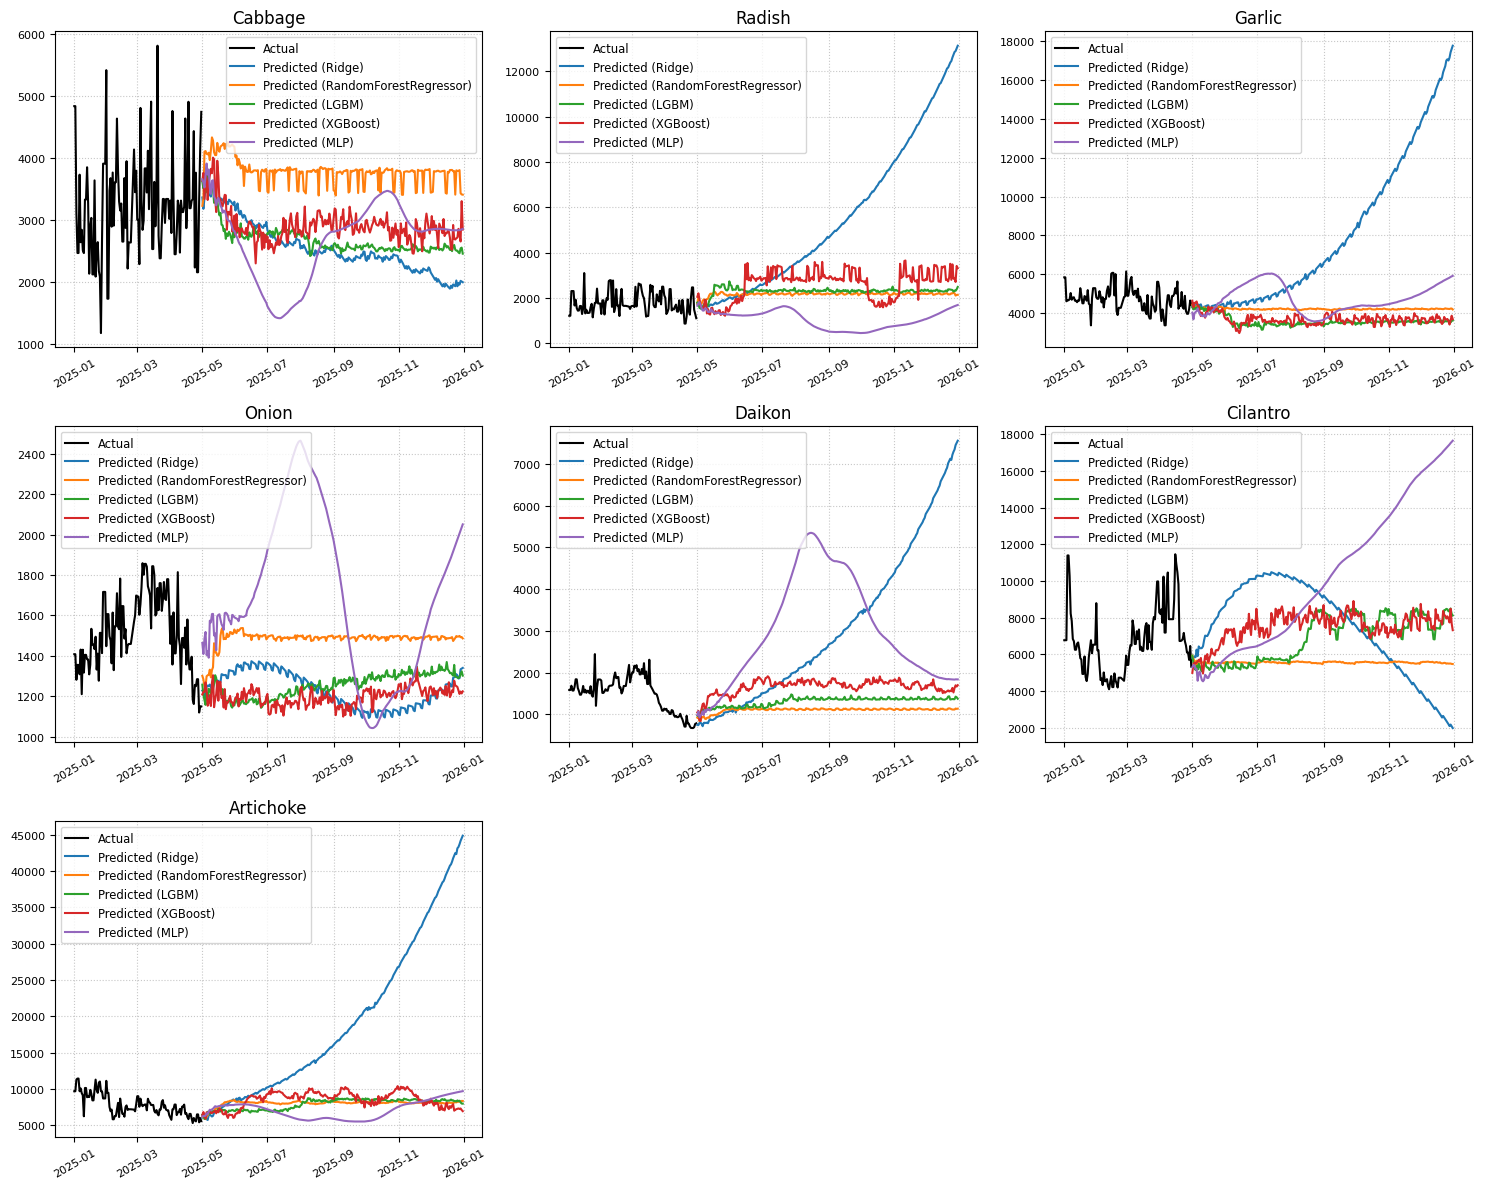

In [ ]:
plot_predictions(df_for_plot, targets)

- 그래프를 보면 알 수 있듯이 Ridge모델의 정확도가 심각한 수준으로 떨어진다는 것을 확인할 수 있음
- Ridge 그래프를 안정화하기 위해 feature sacaling과 alpha 값 조정등을 시도해봤지만 여전히 그래프들의 추이가 심각함
- Rdige와 MLP와 같은 Linear 모델의 경우는 해당 분석에 적합하지 않고 LGBM, XGBoost, RangomForest와 같은 트리 기반의 모델의 성능이 좋다는 것을 확인할 수 있게됨

In [ ]:
data.head()

,date,cabbage,radish,garlic,onion,daikon,cilantro,artichoke,year,month,...,garlic_rolling_mean,garlic_rolling_std,onion_rolling_mean,onion_rolling_std,daikon_rolling_mean,daikon_rolling_std,cilantro_rolling_mean,cilantro_rolling_std,artichoke_rolling_mean,artichoke_rolling_std
0,2021-01-01,713.00,760.00,4182.76,1282.48,2163.33,3862.77,12340.35,2021,1,...,4182.760,NaN,1282.480,NaN,2163.330,NaN,3862.7700,NaN,12340.3500,NaN
1,2021-01-02,713.00,760.00,4182.76,1282.48,2163.33,3862.77,12340.35,2021,1,...,4182.760,0.000000,1282.480,0.000000,2163.330,0.000000,3862.7700,0.000000,12340.3500,0.000000
2,2021-01-03,713.00,760.00,4182.76,1282.48,2163.33,3862.77,12340.35,2021,1,...,4182.760,0.000000,1282.480,0.000000,2163.330,0.000000,3862.7700,0.000000,12340.3500,0.000000
3,2021-01-04,1946.90,708.50,4427.22,1381.92,2083.49,3539.80,8773.32,2021,1,...,4243.875,122.230000,1307.340,49.720000,2143.370,39.920000,3782.0275,161.485000,11448.5925,1783.515000
4,2021-01-05,1307.79,996.28,4731.48,1396.43,2316.91,3281.04,10148.78,2021,1,...,4341.396,242.398137,1325.158,58.663996,2178.078,84.961351,3681.8300,264.113137,11188.6300,1650.332337


In [ ]:
targets = ['cabbage', 'radish', 'garlic', 'onion', 'daikon', 'cilantro', 'artichoke']

In [ ]:
targets

['cabbage', 'radish', 'garlic', 'onion', 'daikon', 'cilantro', 'artichoke']

In [ ]:
real = data.set_index("date")[targets].reset_index()
real

,date,cabbage,radish,garlic,onion,daikon,cilantro,artichoke
0,2021-01-01,713.000,760.00,4182.76,1282.48,2163.33,3862.77,12340.35
1,2021-01-02,713.000,760.00,4182.76,1282.48,2163.33,3862.77,12340.35
2,2021-01-03,713.000,760.00,4182.76,1282.48,2163.33,3862.77,12340.35
3,2021-01-04,1946.900,708.50,4427.22,1381.92,2083.49,3539.80,8773.32
4,2021-01-05,1307.790,996.28,4731.48,1396.43,2316.91,3281.04,10148.78
...,...,...,...,...,...,...,...,...
1573,2025-04-26,2156.310,2470.71,3970.21,1284.41,668.11,6097.55,6511.69
1574,2025-04-27,2156.310,2470.71,3970.21,1284.41,668.11,6097.55,6511.69
1575,2025-04-28,3310.745,1485.51,4212.23,1119.54,689.10,5698.70,5424.83
1576,2025-04-29,4154.870,1302.11,4651.40,1150.63,767.71,6454.00,6009.32


In [ ]:
# 날짜 범위를 2025-12-31까지 확장
date_range = pd.DataFrame({
    'date': pd.date_range(start=real['date'].min(), end='2025-12-31')
})

# 기존 real과 병합 (real에 없는 날짜는 NaN으로 남음)
real = date_range.merge(real, on='date', how='left')
real

,date,cabbage,radish,garlic,onion,daikon,cilantro,artichoke
0,2021-01-01,713.00,760.00,4182.76,1282.48,2163.33,3862.77,12340.35
1,2021-01-02,713.00,760.00,4182.76,1282.48,2163.33,3862.77,12340.35
2,2021-01-03,713.00,760.00,4182.76,1282.48,2163.33,3862.77,12340.35
3,2021-01-04,1946.90,708.50,4427.22,1381.92,2083.49,3539.80,8773.32
4,2021-01-05,1307.79,996.28,4731.48,1396.43,2316.91,3281.04,10148.78
...,...,...,...,...,...,...,...,...
1821,2025-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1822,2025-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1823,2025-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1824,2025-12-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
real.columns

Index(['date', 'cabbage', 'radish', 'garlic', 'onion', 'daikon', 'cilantro',
       'artichoke'],
      dtype='object')

In [ ]:
df_for_plot

,date,cabbage,radish,garlic,onion,daikon,cilantro,artichoke,cabbage_pred_Ridge,radish_pred_Ridge,...,daikon_pred_XGBoost,cilantro_pred_XGBoost,artichoke_pred_XGBoost,cabbage_pred_MLP,radish_pred_MLP,garlic_pred_MLP,onion_pred_MLP,daikon_pred_MLP,cilantro_pred_MLP,artichoke_pred_MLP
0,2025-01-01,4832.75,1217.56,5843.78,1408.03,1580.95,6769.851111,9694.394231,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-01-02,4832.75,1217.56,5843.78,1408.03,1580.95,6769.851111,9694.394231,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-01-03,3110.80,2309.07,4613.04,1281.47,1683.65,6769.851111,11304.910000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2025-01-04,2466.66,2308.51,4664.59,1355.17,1567.71,11395.750000,11444.510000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2025-01-05,2466.66,2308.51,4664.59,1355.17,1567.71,11395.750000,11444.510000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,2025-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1985.248773,12737.699946,...,1521.983521,7945.138672,7329.470215,2834.041716,1621.919832,5800.050886,1989.052976,1831.900139,17386.446053,9591.434113
358,2025-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1956.976714,12859.689297,...,1628.224365,7736.614258,7256.750488,2835.651376,1641.608250,5827.791971,2004.557640,1830.733297,17451.378131,9620.376729
359,2025-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.127784,12903.812261,...,1693.854614,8486.793945,7326.436035,2840.822355,1657.810712,5865.543923,2020.688546,1836.152470,17528.129240,9653.411252
360,2025-12-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006.484698,13021.630686,...,1663.044922,7683.057129,7109.197266,2846.876323,1676.108396,5893.299266,2035.459430,1835.564565,17593.093943,9682.328924


In [ ]:

pred_cols = [col for col in df_for_plot.columns if 'pred' in col or 'date' in col]


In [ ]:
pred = df_for_plot[pred_cols]
pred.columns


Index(['date', 'cabbage_pred_Ridge', 'radish_pred_Ridge', 'garlic_pred_Ridge',
       'onion_pred_Ridge', 'daikon_pred_Ridge', 'cilantro_pred_Ridge',
       'artichoke_pred_Ridge', 'cabbage_pred_RandomForestRegressor',
       'radish_pred_RandomForestRegressor',
       'garlic_pred_RandomForestRegressor', 'onion_pred_RandomForestRegressor',
       'daikon_pred_RandomForestRegressor',
       'cilantro_pred_RandomForestRegressor',
       'artichoke_pred_RandomForestRegressor', 'cabbage_pred_LGBM',
       'radish_pred_LGBM', 'garlic_pred_LGBM', 'onion_pred_LGBM',
       'daikon_pred_LGBM', 'cilantro_pred_LGBM', 'artichoke_pred_LGBM',
       'cabbage_pred_XGBoost', 'radish_pred_XGBoost', 'garlic_pred_XGBoost',
       'onion_pred_XGBoost', 'daikon_pred_XGBoost', 'cilantro_pred_XGBoost',
       'artichoke_pred_XGBoost', 'cabbage_pred_MLP', 'radish_pred_MLP',
       'garlic_pred_MLP', 'onion_pred_MLP', 'daikon_pred_MLP',
       'cilantro_pred_MLP', 'artichoke_pred_MLP'],
      dtype='object')

In [ ]:
new = real.merge(pred, on='date', how='left')
new

,date,cabbage,radish,garlic,onion,daikon,cilantro,artichoke,cabbage_pred_Ridge,radish_pred_Ridge,...,daikon_pred_XGBoost,cilantro_pred_XGBoost,artichoke_pred_XGBoost,cabbage_pred_MLP,radish_pred_MLP,garlic_pred_MLP,onion_pred_MLP,daikon_pred_MLP,cilantro_pred_MLP,artichoke_pred_MLP
0,2021-01-01,713.00,760.00,4182.76,1282.48,2163.33,3862.77,12340.35,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-01-02,713.00,760.00,4182.76,1282.48,2163.33,3862.77,12340.35,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-01-03,713.00,760.00,4182.76,1282.48,2163.33,3862.77,12340.35,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-01-04,1946.90,708.50,4427.22,1381.92,2083.49,3539.80,8773.32,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-01-05,1307.79,996.28,4731.48,1396.43,2316.91,3281.04,10148.78,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,2025-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1985.248773,12737.699946,...,1521.983521,7945.138672,7329.470215,2834.041716,1621.919832,5800.050886,1989.052976,1831.900139,17386.446053,9591.434113
1822,2025-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1956.976714,12859.689297,...,1628.224365,7736.614258,7256.750488,2835.651376,1641.608250,5827.791971,2004.557640,1830.733297,17451.378131,9620.376729
1823,2025-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.127784,12903.812261,...,1693.854614,8486.793945,7326.436035,2840.822355,1657.810712,5865.543923,2020.688546,1836.152470,17528.129240,9653.411252
1824,2025-12-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006.484698,13021.630686,...,1663.044922,7683.057129,7109.197266,2846.876323,1676.108396,5893.299266,2035.459430,1835.564565,17593.093943,9682.328924


In [ ]:
file_path = "streamlit_data.csv"
new.to_csv(file_path, index=False)


In [ ]:
metric_summary = pd.concat([metrics])\
        .pivot(index = 'product', columns='model', values='MdAPE').round(5).reset_index()

In [ ]:
file_path = "metric_summary.csv"
metric_summary.to_csv(file_path, index = False)